# UC San Diego: Neural Data Science
## Cortical Organoids

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Names

- Bryant Cao
- Zhining Chen
- Simon Fei 
- Malachi Mabie
- Juncong Shi
- Lulu Ricketts

# Overview

Using prior work by Trujillo et al., 2019, we conducted an exploratory analysis to integrate gene expression information to electrophysiological features in cortical organoid populations over the course of developmental stages of 1, 3, 6, and 10 months. In order to determine relative gene expression levels and proportions of cell type populations, we reproduced the authors' single-cell RNA sequencing analysis in Python. We extracted electrophysiological features such as the average spike rate, the inter-spike interval, and oscillations from these organoid populations at similar time points as well. Through our analysis, we were able to observe transcriptomic changes in organoid populations relative to electrical features that might infer organoid developmental stage from these combined features.

<a id='research_question'></a>
# Research Question

Can we combine gene expression and electrophysiological profiles from cortical organoid populations as a developmental model that leverages gene expression changes as a predictor for increases in spiking and network complexity?

<a id='background'></a>

## Background & Prior Work

Cortical organoids are three-dimensional cell cultures derived from induced pluripotent stem cells that resemble the structural and functional organization of the human brain, and have been used as model systems for studying features in human brain development [1](https://www.cell.com/cell-stem-cell/fulltext/S1934-5909(20)30055-2). Developmental changes in organoids can be observed through profiling of electrophysiological features, however prior research has suggested that neurogenetics is a contributor to changes as well [2](https://www.pnas.org/content/112/51/15672). Understanding how organoid populations differentiate with respect to both electrophysiological and transcriptomic features can be informative in identifying the underlying basis of neural development from a genetic perspective in a model system.

Prior work has been done to explore this genetic basis of neural development as it relates to electrical activity in early stages. In a paper by Trujillo et al., 2019, the authors used both single-cell RNA sequencing (scRNA-seq) and multi-electrode array (MEA) recordings to observe cell type differentiation, complex network dynamics, and the emergence of oscillatory activity from 1-10 month cortical organoids [3](https://www.cell.com/cell-stem-cell/fulltext/S1934-5909(19)30337-6). As both of these datasets of gene expression and electrode recordings are publicly available, there are further analyses that we would like to conduct - namely to further integrate the authors’ two datasets to better understand how changes in gene expression or inferred cell type populations correlate with electrophysiological features.

References:
- 1) [Qian, X. et al. Sliced Human Cortical Organoids for Modeling Distinct Cortical Layer Formation. Cell Stem Cell 26, 766-781.e9 (2020).](https://www.cell.com/cell-stem-cell/fulltext/S1934-5909(20)30055-2)
- 2) [Camp, J. G. et al. Human cerebral organoids recapitulate gene expression programs of fetal neocortex development. PNAS 112, 15672–15677 (2015).](https://www.pnas.org/content/112/51/15672)
- 3) [Trujillo, C. A. et al. Complex Oscillatory Waves Emerging from Cortical Organoids Model Early Human Brain Network Development. Cell Stem Cell 25, 558-569.e7 (2019).](https://www.cell.com/cell-stem-cell/fulltext/S1934-5909(19)30337-6)


# Hypothesis


We hypothesize that developmental variations in electrophysiological features can be correlated to changes in relative gene expression and cell type proportions in cortical organoids from 1 to 10 months. Through our reproduction of the scRNA-seq analysis, we expect to generate similar cell type clusterings and differentiation proportions compared to the original analysis. Combining features in electrophysiological data to information of cell type populations may point to novel trends that have not been discovered before. 

# Datasets

- Dataset Name: Feature-barcode matrix of 1-month cortical organoids
- Link to the dataset: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM3734294
- Number of observations: 4832 cells, 33694 genes

A raw gene expression matrix file and its associated gene/cell annotations from a population of 1-month cortical organoids. This dataset was generated from the Cell Ranger software by 10x Genomics following a single-cell RNA sequencing procedure of approximately 12000 cells, reference genome alignment, and preprocessing.

- Dataset Name: Feature-barcode matrix of 3-month cortical organoids
- Link to the dataset: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM3734295
- Number of observations: 3158 cells, 33694 genes

A raw gene expression matrix file and its associated gene/cell annotations from a population of 3-month cortical organoids. This dataset was generated from the Cell Ranger software by 10x Genomics following a single-cell RNA sequencing procedure of approximately 12000 cells, reference genome alignment, and preprocessing.

- Dataset Name: Feature-barcode matrix of 6-month cortical organoids
- Link to the dataset: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM3734296 
- Number of observations: 4888 cells, 33694 genes

A raw gene expression matrix file and its associated gene/cell annotations from a population of 6-month cortical organoids. This dataset was generated from the Cell Ranger software by 10x Genomics following a single-cell RNA sequencing procedure of approximately 12000 cells, reference genome alignment, and preprocessing.

- Dataset Name: Feature-barcode matrix of 10-month cortical organoids
- Link to the dataset: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM3734297 
- Number of observations: 3208 cells, 33694 genes

A raw gene expression matrix file and its associated gene/cell annotations from a population of 10-month cortical organoids. This dataset was generated from the Cell Ranger software by 10x Genomics following a single-cell RNA sequencing procedure of approximately 12000 cells, reference genome alignment, and preprocessing.

- Dataset Name: Multi-electrode array recordings from cortical organoids over 228 days
- Link to the dataset: https://drive.google.com/drive/folders/1uK0Q5XRFpBfSb-dlOkMxOQcO-zcLFSlk?usp=sharing
- Number of observations: 36 accessible recordings at various time points, 8 wells per recording, 64 electrodes per well

These are the MEA recordings from 8 different cortical organoids each living in their own well. Recording were done over the course of 228 days with each recording session lasting about 240 seconds at 1000 Hz.

We plan to integrate these gene expression matrices and MEA recordings in order to determine longer-term changes in transcriptomic and electrical features from organoid populations over the course of developmental stages.


In [2]:
# import modules
import scipy
import scanpy as sc
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sns
import glob
import warnings
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
import mat73

from scipy import signal
from fooof import FOOOF
from fooof.sim.gen import gen_power_spectrum
from fooof.sim.utils import set_random_seed
from fooof.plts.spectra import plot_spectrum
from fooof.plts.annotate import plot_annotated_model

# For importing LFP datasets
from os import walk

# For converting the date to days from the starting date
from datetime import date as get_date

from scipy.io import loadmat
%run spikesorting_helperfunctions.py # import several helper functions for this analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

We conduct two sets of analyses throughout most of these steps - one for gene expression and the other for MEA recordings. Once both datasets have been processed, we then integrate the cell type assignments into the MEA data for a combined analysis.

# Data Wrangling

## Gene expression data wrangling

Objectives in this section:
- Read the four feature-barcode matrices
- Confirm the size of the data structure

In [2]:
# read the feature-barcode matrices from the Cell Ranger pipeline output by 10x Genomics
# these matrices quantify gene expression (through read abundance) to a barcoded cell

m1 = sc.read_10x_mtx('./data/scRNA-seq', var_names = 'gene_ids', prefix = 'GSM3734294_1M_cortical_organoids_', cache = True)  # the directory with the `.mtx` file
m3 = sc.read_10x_mtx('./data/scRNA-seq', var_names = 'gene_ids', prefix = 'GSM3734295_3M_cortical_organoids_', cache = True)  
m6 = sc.read_10x_mtx('./data/scRNA-seq', var_names = 'gene_ids', prefix = 'GSM3734296_6M_cortical_organoids_', cache = True)  
m10 = sc.read_10x_mtx('./data/scRNA-seq', var_names = 'gene_ids', prefix = 'GSM3734297_10M_cortical_organoids_', cache = True) 


... reading from cache file cache/data-scRNA-seq-GSM3734294_1M_cortical_organoids_matrix.h5ad
... reading from cache file cache/data-scRNA-seq-GSM3734295_3M_cortical_organoids_matrix.h5ad
... reading from cache file cache/data-scRNA-seq-GSM3734296_6M_cortical_organoids_matrix.h5ad
... reading from cache file cache/data-scRNA-seq-GSM3734297_10M_cortical_organoids_matrix.h5ad


In [3]:
# confirm size of gene expression matrix
for dataset in [m1, m3, m6, m10]:
    print(dataset)

AnnData object with n_obs × n_vars = 4832 × 33694
    var: 'gene_symbols'
AnnData object with n_obs × n_vars = 3158 × 33694
    var: 'gene_symbols'
AnnData object with n_obs × n_vars = 4888 × 33694
    var: 'gene_symbols'
AnnData object with n_obs × n_vars = 3208 × 33694
    var: 'gene_symbols'


## MEA data wrangling and data cleaning

Objectives in this section:
- Use existing modules to load the MEA data
- LFP features are loaded and extracted one file at a time

In [2]:
# Load the filenames of the LFP datasets
mats = []
for (dirpath, dirnames, filenames) in walk("./data/CTC/LFP"):
    if 'Drugs' in dirpath or 'ts' in dirpath:
        continue
    filenames = [string for string in filenames if '.DS_Store' not in string]
    if len(filenames) == 0:
        continue
    mats.append(dirpath + '/' + filenames[0])
dates = [string[19:25] for string in mats] # Magic Number for portion in file path
dates.sort()
mats.sort()

# Create the features dataframe on the level of electrodes averaging across time
def create_electrode_features_df(data_dict):
    # Get basic features
    df = pd.DataFrame(columns=["well","electrode","spike_cnt","avg_spike_rate"])
    time = max(data_dict['t_ds'])
    for well in range(4,12): # skipping the first 4 wells since they are empty
        for electrode in range(64):
            spike_cnt = data_dict['spike_cnt'][well,electrode]
            avg_spike_rate = spike_cnt / time
            df.loc[len(df),:] = [well,electrode,spike_cnt,avg_spike_rate]
    
    # Filter out the silent electrodes(<1Hz)
    filtd_df = df.loc[df.avg_spike_rate > 1]
    
    # Calculate Average ISIs and Fano Factors
    avg_isi = [0] * len(filtd_df['well'])
    fano = [0] * len(filtd_df['well'])
    i = 0
    for (well, electrode) in zip(filtd_df['well'], filtd_df['electrode']):
        indexes = list(np.squeeze(data_dict['spikes'][well][electrode]).astype(int)) ######
        spike_time1 = data_dict['t_s'][indexes].reshape(len(indexes))
        spike_time1 = list(spike_time1)
        spike_time2 = spike_time1.copy()
        spike_time2.insert(0,0)
        spike_time2 = spike_time2[:-1]
        isi = np.array(spike_time1) - np.array(spike_time2)
        isi = isi[1:]
        avg_isi[i] = isi.mean()
        spike_train = np.zeros(np.size(data_dict['t_s']))
        spike_train[indexes] = 1
        fano[i] = spike_train.var()/spike_train.mean()
        i += 1
    filtd_df['avg_isi'] = avg_isi
    filtd_df['fano'] = fano
    
    return filtd_df

# Taking the average of electrodes for each well
def create_well_features_from_electrode_features(df):
    avg_df = pd.DataFrame(columns=["well","avg_spike_cnt","avg2_spike_rate", "avg2_isi", "avg_fano"])
    for well in df.well.unique():
        avg_spike_cnt = df.loc[df.well == well, "spike_cnt"].mean()
        avg2_spike_rate = float(df.loc[df.well == well, "avg_spike_rate"].mean())
        avg2_isi = df.loc[df.well == well, "avg_isi"].mean()
        avg_fano = df.loc[df.well == well, "fano"].mean()
        avg_df.loc[len(avg_df),:] = [well,avg_spike_cnt,avg2_spike_rate,avg2_isi,avg_fano]
    return avg_df

# Create the oscillatory features at the level of wells
def create_oscillatory_features_df(data_dict):
    # remove the empty wells
    data_LFP = data_dict['LFP']
    data_LFP_1 = []
    for i in range(len(data_LFP)):
        if i > 3:
            data_LFP_1.append(list(data_LFP[i]))
    # use fooof to find oscillation
    freq_range = [0, 85]
    fm = FOOOF(min_peak_height=0.05, verbose=False)
    n = len(data_LFP_1)
    percent_oscillation = np.zeros((n))
    average_oscillation = np.zeros((n))
    average_centerfreq = np.zeros((n))
    average_power = np.zeros((n))
    for i in range(n):
        well = np.squeeze(data_LFP_1[i])
        peaks = []
        cfs = []
        powers = []
        for j in range(64):
            if 0 not in well[:, j]: # some channels contains only zeros
                f, power = signal.welch(well[:,j], 1000)
                fm.fit(f, power, freq_range)
                peak = fm.n_peaks_
                if peak != 0:
                    peaks.append(peak)
                    cf = fm.get_params('peak_params', 'CF')
                    avg_cf = np.mean(cf)
                    cfs.append(avg_cf)
                    pw = fm.get_params('peak_params', 'PW')
                    avg_pw = np.mean(pw)
                    powers.append(avg_pw)
        average_oscillation[i] = np.mean(peaks)
        average_centerfreq[i] = np.mean(cfs)
        average_power[i] = np.mean(powers)
        percent_oscillation[i] = len(peaks)/64
    d = {'average_oscillation':average_oscillation,'average_centerfreq':average_centerfreq,
     'average_power':average_power,'percent_oscillation':percent_oscillation}
    df = pd.DataFrame(data=d)
    
    return df

def date2day(date): 
    month = int(date[:2])
    day = int(date[2:4])
    year = int(date[4:]) + 2000
    return (get_date(year, month, day) - get_date(2016, 7, 31)).days

%%time
# magic that tells you how long the cell takes to run

# Analyze each dataset sequentially
progress_tracker = 0
print(f"\nAnalyzing LFP Datasets\t",end="")
df = pd.DataFrame(columns=['day',"well","avg_spike_cnt","avg2_spike_rate", "avg2_isi", "avg_fano",
                            'average_oscillation','average_centerfreq','average_power',
                            'percent_oscillation'])
for (path,date) in zip(mats,dates):
    progress_tracker += 1
    if (progress_tracker % (len(mats)//10) == 0):
            print("■",end="")
    try:
        data_dict = loadmat(path)
    except:
        try:
            data_dict = mat73.loadmat(path)
        except:
            print(date + ' cannot be loaded') # there are a few files that just can't be loaded
            continue
    try:
        df_electrode = create_electrode_features_df(data_dict)
        df_well = create_well_features_from_electrode_features(df_electrode)
        df_oscillatory = create_oscillatory_features_df(data_dict)
        df_combined = pd.concat([df_well, df_oscillatory], axis=1)
        df_combined['day'] = [date2day(date)] * 8 # for all 8 wells
        df = df.append(df_combined)
    except:
        print(date)

df.sort_values(by=['day','well'], inplace=True)
df

out_path = './data/LFP_features.csv'
df.to_csv(out_path, index = False, header = True)

# Data Cleaning

## Gene expression data cleaning

Objectives in this section:
- Filter the number of cells and genes to keep only highly expressing samples
- Confirm the size of the data structure post-filtering
- Remove any duplicate genes or mitochondrial reads as these can complicate/confound RNA-seq results

In [6]:
# filter cells and genes - keep relatively high expression samples only as done in the original analysis
for dataset in [m1, m3, m6, m10]:
    sc.pp.filter_cells(dataset, min_genes = 200)
    sc.pp.filter_genes(dataset, min_cells = 5)

/Users/bryantcao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
filtered out 14803 genes that are detected in less than 5 cells
filtered out 17619 genes that are detected in less than 5 cells
filtered out 17697 genes that are detected in less than 5 cells
filtered out 18862 genes that are detected in less than 5 cells


In [7]:
# displaying cell and gene counts post-filtering
for dataset in [m1, m3, m6, m10]:
    print(dataset)

AnnData object with n_obs × n_vars = 4832 × 18891
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'log_counts', 'n_genes'
    var: 'gene_symbols', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
AnnData object with n_obs × n_vars = 3158 × 16075
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'log_counts', 'n_genes'
    var: 'gene_symbols', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
AnnData object with n_obs × n_vars = 4888 × 15997
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'log_counts', 'n_genes'
    var: 'gene_symbols', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
AnnData object with n_obs × n_vars = 3208 × 14832
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts'

In [3]:
# further gene data cleaning
for dataset in [m1, m3, m6, m10]:
    dataset.var_names_make_unique() # remove duplicate gene IDs if present

    # calculate QC metrics - gene count, read count, mitochrondrial reads
    dataset.var['mt'] = dataset.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
    sc.pp.calculate_qc_metrics(dataset, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    
    dataset.obs['n_counts'] = dataset.X.sum(1)
    dataset.obs['log_counts'] = np.log(dataset.obs['n_counts'])
    dataset.obs['n_genes'] = (dataset.X > 0).sum(1)

# Data Visualization

## Gene expression data visualizations (post-cleaning)
Objectives in this section:
- Visualize QC metrics
    - The number of genes with the corresponding number of read counts - genes have differential read counts (some are more expressed than others)
    - The total number of read counts across cells - cells should have read counts if they are expressing any genes (this could differ by cell type is one type is more active for a biological reason)
    - The percentage of mitochondrial reads (can confound results if not accounted for so this should be 0 if prior analyses filtered these reads out)
- Visualize mean gene expression across developmental stages selected from highly expressed genes based on the original analysis

Genes, total read counts, and mitochondrial read counts for 1-month organoids


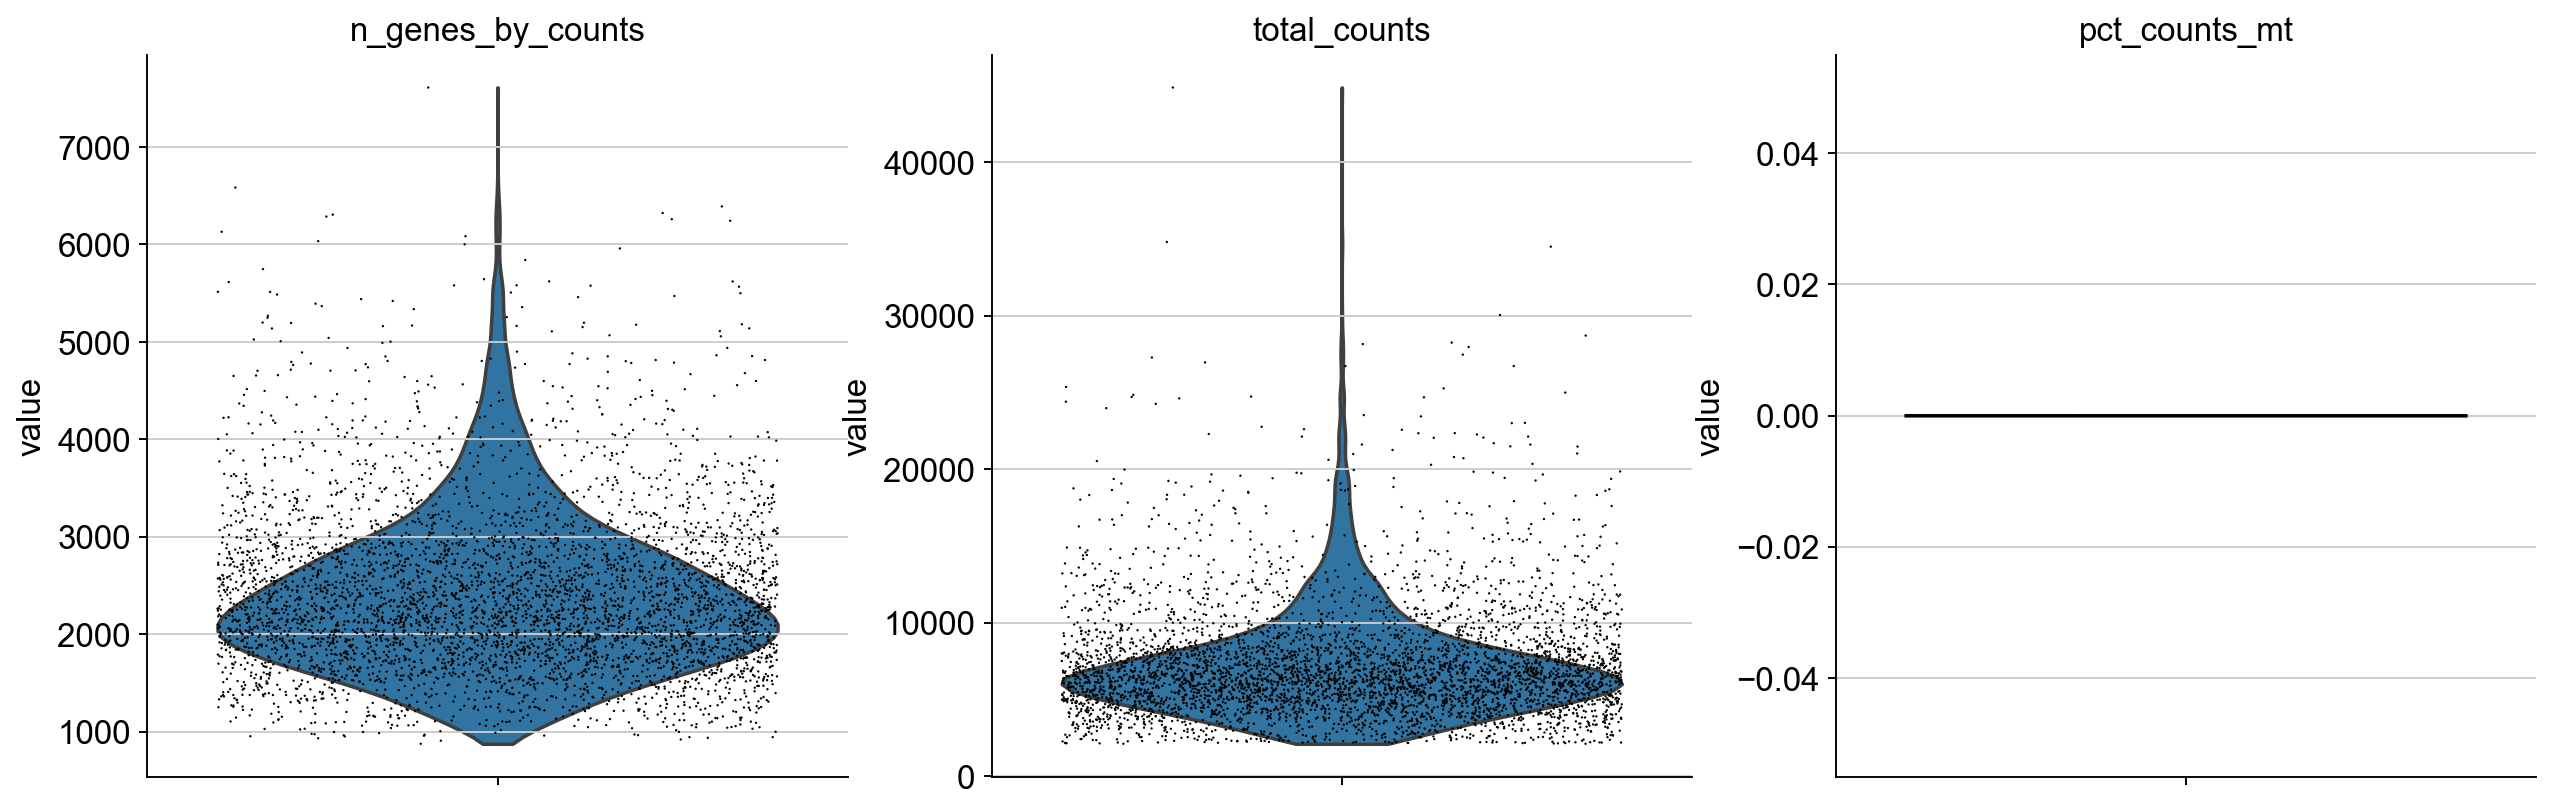

Genes, total read counts, and mitochondrial read counts for 3-month organoids


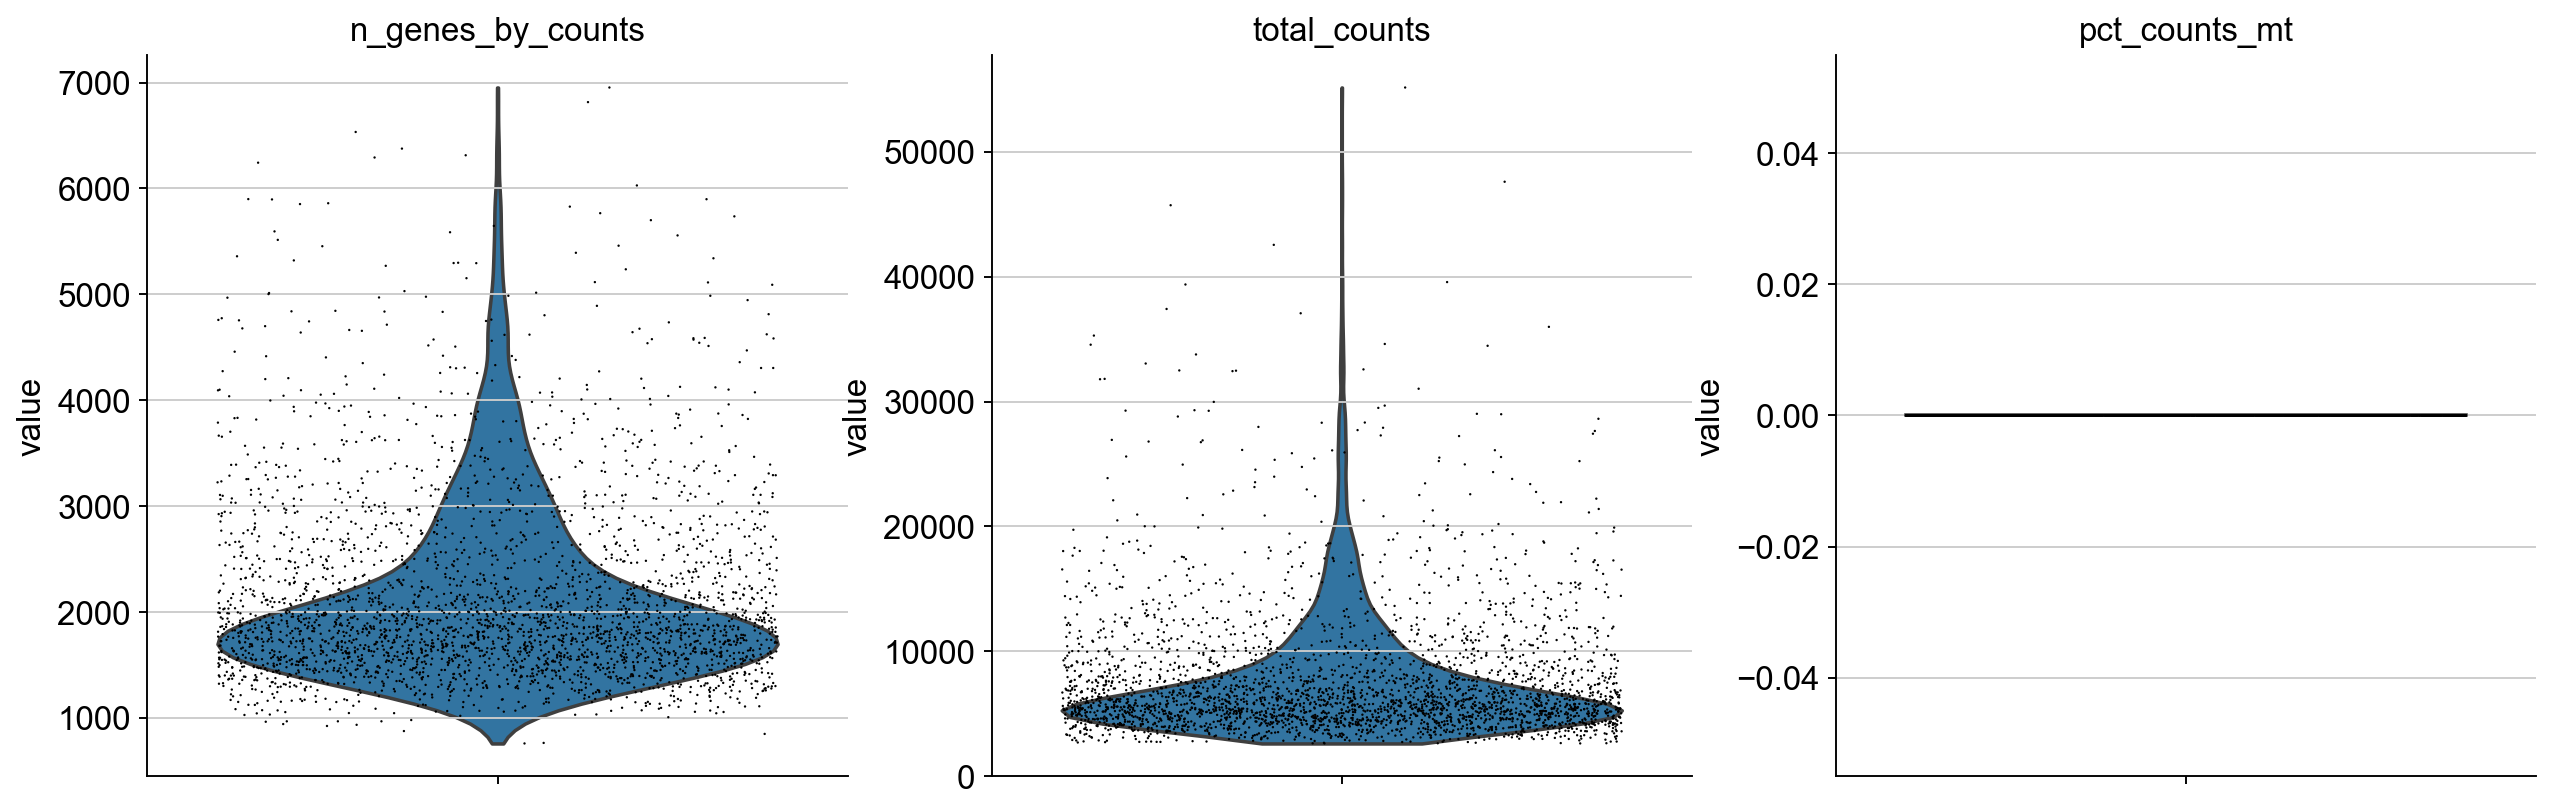

Genes, total read counts, and mitochondrial read counts for 6-month organoids


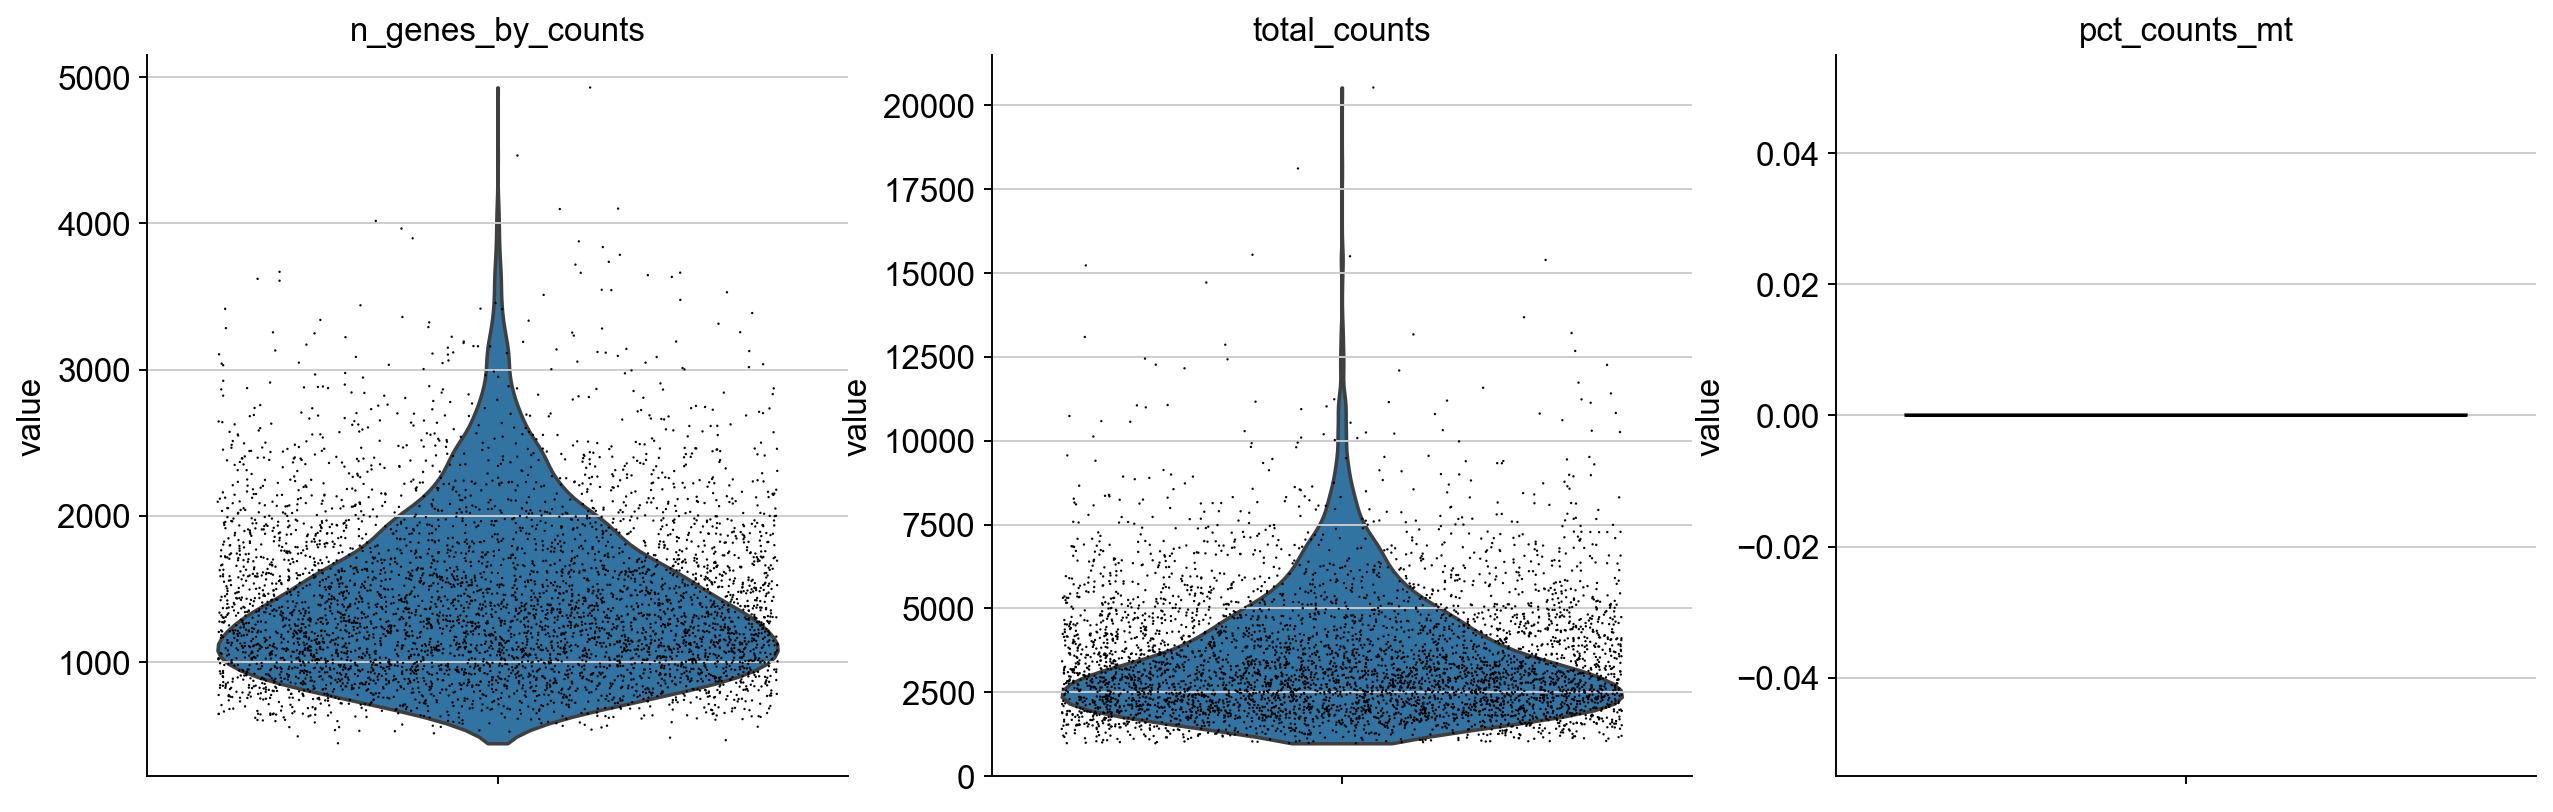

Genes, total read counts, and mitochondrial read counts for 10-month organoids


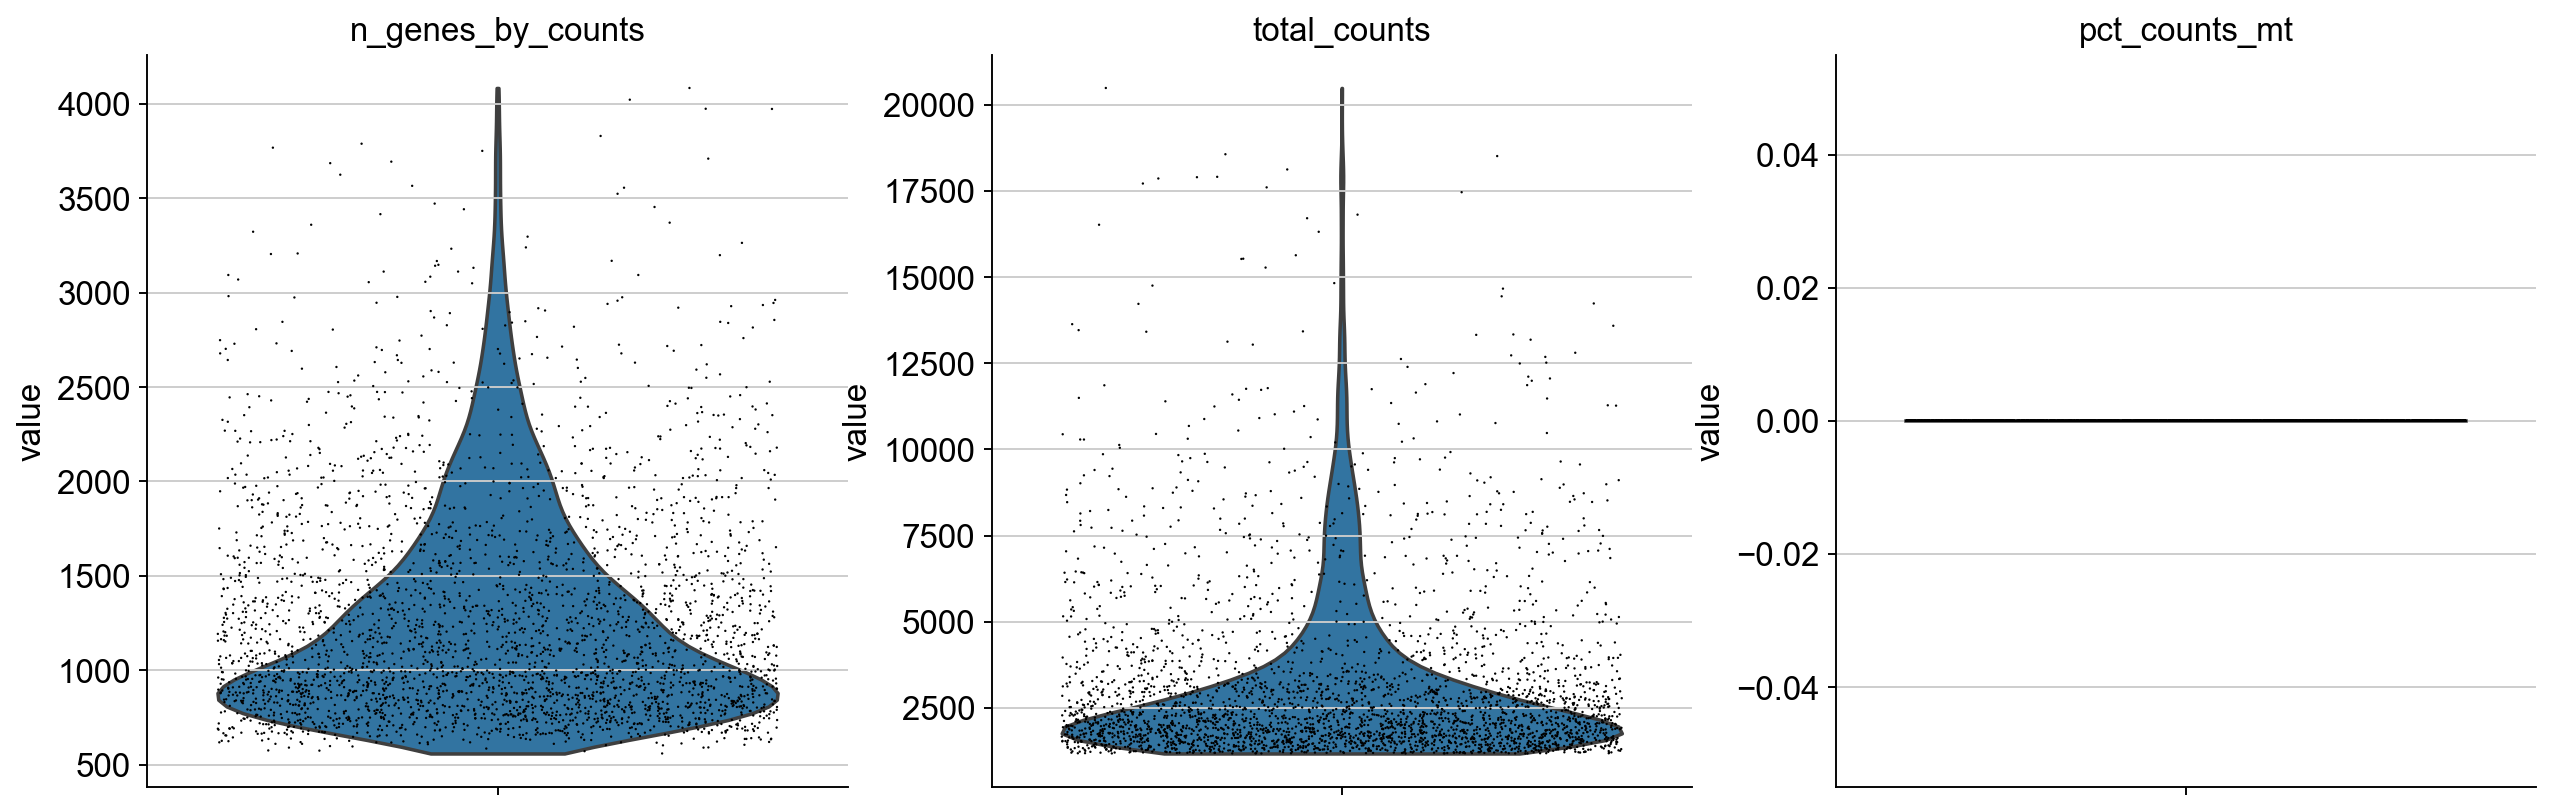

In [36]:
# visualizing QC metrics post-data cleaning
for month, dataset in zip(['1-month', '3-month', '6-month', '10-month'],[m1, m3, m6, m10]):
    print('Genes, total read counts, and mitochondrial read counts for ' + month + ' organoids')
    sc.pl.violin(dataset, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

Visualize a summary set of violin plots showing cell density and collective mean gene expression of a cell type using the highly expressed genes from the original analysis. Mitotic cells show the most dramatic shift in mean gene expression over developmental time, while other cell types suggest consistent mean gene expression values across many genes.

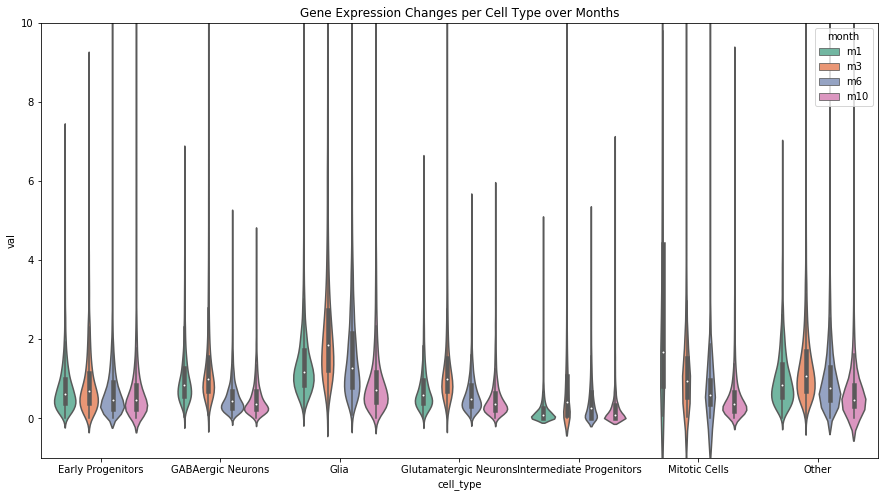

In [35]:
data_path = 'data/'

m1 = pd.read_csv(data_path + 'm1.csv', header=None)
m3 = pd.read_csv(data_path + 'm3.csv', header=None)
m6 = pd.read_csv(data_path + 'm6.csv', header=None)
m10 = pd.read_csv(data_path + 'm10.csv', header=None)

genes_df = pd.read_csv(data_path + 'the_table.csv', index_col=0)
genes_df.columns = ['type', 'gene_name']
genes_df.reset_index(drop=True, inplace=True)
genes_df

m1.index = genes_df['gene_name']
m3.index = genes_df['gene_name']
m6.index = genes_df['gene_name']
m10.index = genes_df['gene_name']

m1 = pd.merge(m1, genes_df, on='gene_name', how='left')
m3 = pd.merge(m3, genes_df, on='gene_name', how='left')
m6 = pd.merge(m6, genes_df, on='gene_name', how='left')
m10 = pd.merge(m10, genes_df, on='gene_name', how='left')

m1_g = m1.groupby('type')[np.arange(4832)].mean().T
m3_g = m3.groupby('type')[np.arange(3158)].mean().T
m6_g = m6.groupby('type')[np.arange(4888)].mean().T
m10_g = m10.groupby('type')[np.arange(3208)].mean().T

l = []
names = ['m1', 'm3', 'm6', 'm10']
for m,name in zip([m1_g, m3_g, m6_g, m10_g], names):
    for c in m.columns:
        for i in m[c]:
            l.append([c,i,name])
            
new_df = pd.DataFrame(l, columns=['cell_type', 'val', 'month'])

plt.figure(figsize=(15,8))
sns.violinplot(x='cell_type', y='val', data=new_df, hue='month', palette='Set2')
plt.ylim([-1,10])
plt.title('Gene Expression Changes per Cell Type over Months')
plt.show()

Visualize a lineplot of average gene expression using the highly expressed genes of each cell type over time. Mitotic cells show the highest mean gene expression at 1-month (likely a component of very early development) which begins to  reduce in gene expression which is expected as cell differentiation is occurring in later stages.

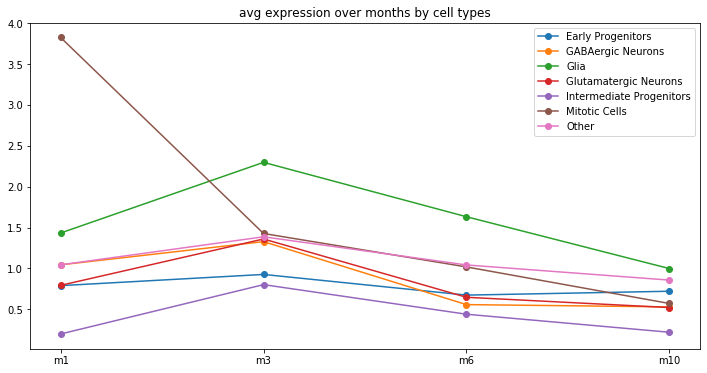

In [38]:
plt.figure(figsize=(12,6))
for c in avgs.index:
    plt.plot(avgs.loc[c], 'o-', label=c)
plt.legend()
plt.title('avg expression over months by cell types')
plt.show()

## MEA data visualizations
Objectives in this section:
- Summarize the key features of the MEA recordings
- Visualize an example of the gradation to the electrode recordings as a QC measure
- Visualize an example of the features of an electrode recording

Generate a summary table of the consolidated MEA recording data for each day and well. The features that are quantified are the average spike count, average spike rate, average inter-spike interval, average Fano factor, average oscillation number (the number of oscillations at a given point), average center frequency, average power (amplitude), and the percent oscillation (the percentage of electrodes with oscillations).

In [9]:
df.sort_values(by=['day','well'], inplace=True)
df
out_path = './data/LFP_features.csv'
df.to_csv(out_path, index = False, header = True)

day well avg_spike_cnt avg2_spike_rate   avg2_isi  avg_fano  \
0     0    4        592.96         2.46043   0.411889  0.999803   
1     0    5       583.909         2.42287   0.326535  0.999806   
2     0    7           368         1.52698   0.652252  0.999878   
3     0    8        698.65         2.89897   0.325436  0.999768   
4     0    9           702         2.91288    0.31332  0.999767   
..  ...  ...           ...             ...        ...       ...   
3   228    7       7231.33         26.7086   0.126041  0.997863   
4   228    8       7295.35         26.9451  0.0609655  0.997844   
5   228    9       7447.94         27.5086  0.0473421  0.997799   
6   228   10       5840.46         21.5715   0.101632  0.998274   
7   228   11         11612         42.8885  0.0459127  0.996569   

    average_oscillation  average_centerfreq  average_power  \
0              1.719298           35.817305       0.114476   
1              1.615385           31.861383       0.148159   
2              1.564516           38.725566       0.249579   
3              1.560000           29.169260       0.141339   
4              1.466667           36.997182       0.119334   
..                  ...                 ...            ...   
3              1.568627           42.520510       0.114972   
4              1.600000           42.338487       0.165105   
5              1.560976           44.737590       0.121486   
6              1.233333           55.017586       0.139729   
7              1.296296           62.811622       0.201099   

    percent_oscillation  
0              0.890625  
1              0.812500  
2              0.968750  
3              0.781250  
4              0.703125  
..                  ...  
3              0.796875  
4              0.781250  
5              0.640625  
6              0.468750  
7              0.421875  

[288 rows x 10 columns]

Visualize the total firing count for a particular recording session across the 8 wells as a quality check measure of the MEA recording data. The gradation of the firing counts in this visualization suggests that this recording is a quality one to analyze.

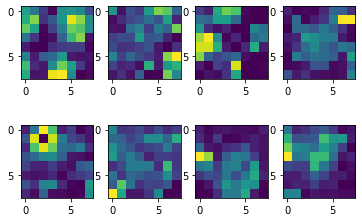

In [48]:
data_dict = loadmat('../CTC/LFP/CTC_110416/LFP_Sp.mat')
for i in range(5, 13):
    plt.subplot(2, 4, i-4)
    plt.imshow(data_dict['spike_cnt'][i-1].reshape(-1, 8))

Visualize the individual spike waveforms and the average of the waveforms from a single active electrode over the course a particular recording session. Although spikes are visible, the waveform is not clean and the signal-to-noise ratio is low.

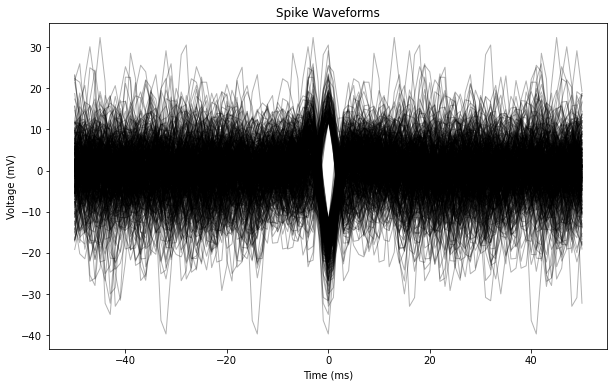

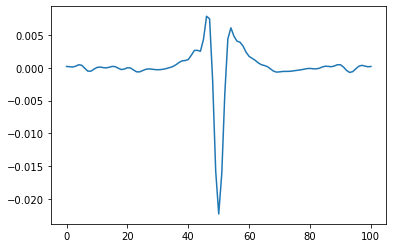

In [51]:
pre = 0.05 # 50 ms
post= 0.051 # 51 ms
plot_waveforms(data_dict['spike_shape'][5][59].T, 1000, pre, post, n = 500)
plt.plot(data_dict['spike_avg'][5][59])

Plot the certain features of an electrode recording - specifically the center frequency and the power. From this example, this suggests that the oscillatory features are visible for analysis.

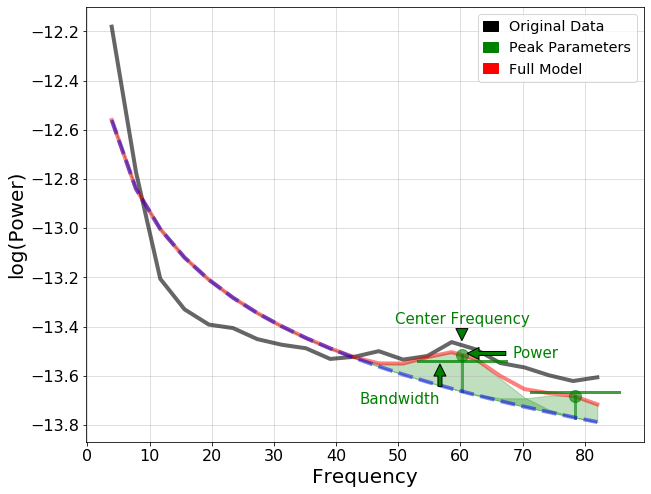

In [23]:
plot_annotated_model(fm, annotate_aperiodic=False)

# Data Analysis & Results

## Gene expression data analysis and results
Objectives in this section:
- Reproduce the scRNA-seq analysis done in [Trujillo et al., 2019](https://www.cell.com/cell-stem-cell/fulltext/S1934-5909(19)30337-6) to determine quantifiable gene expression profiles and cell type clustering information using Scanpy in Python instead of Seurat v2.0 in R
    -  Arguments identical to the original analysis were passed through Scanpy functions if they were specified in the publication, otherwise default parameters were used

Scale and log-normalize read counts across cells to a total of 10000 transcripts per cell to perform cross-cell comparisons. Once normalized, annotate the sample for highly variable genes based on mean expression and their dispersions from others - these highly variable genes are the most variable in mean expression levels from the rest of the sample population and can be used in downstream clustering analyses.

In [9]:
for dataset in [m1, m3, m6, m10]:
    sc.pp.normalize_total(dataset, target_sum=1e4)
    sc.pp.log1p(dataset)
    sc.pp.highly_variable_genes(dataset, min_mean = 0.1, max_mean = 8)
    print('Highly variable genes in dataset:', len(dataset.var[dataset.var['highly_variable'] == True]))

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes


Highly variable genes in dataset: 1009


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes


Highly variable genes in dataset: 899


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes


Highly variable genes in dataset: 867


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


Highly variable genes in dataset: 1464


Scatterplots of normalized and non-normalized mean gene expression from 1-month organoids


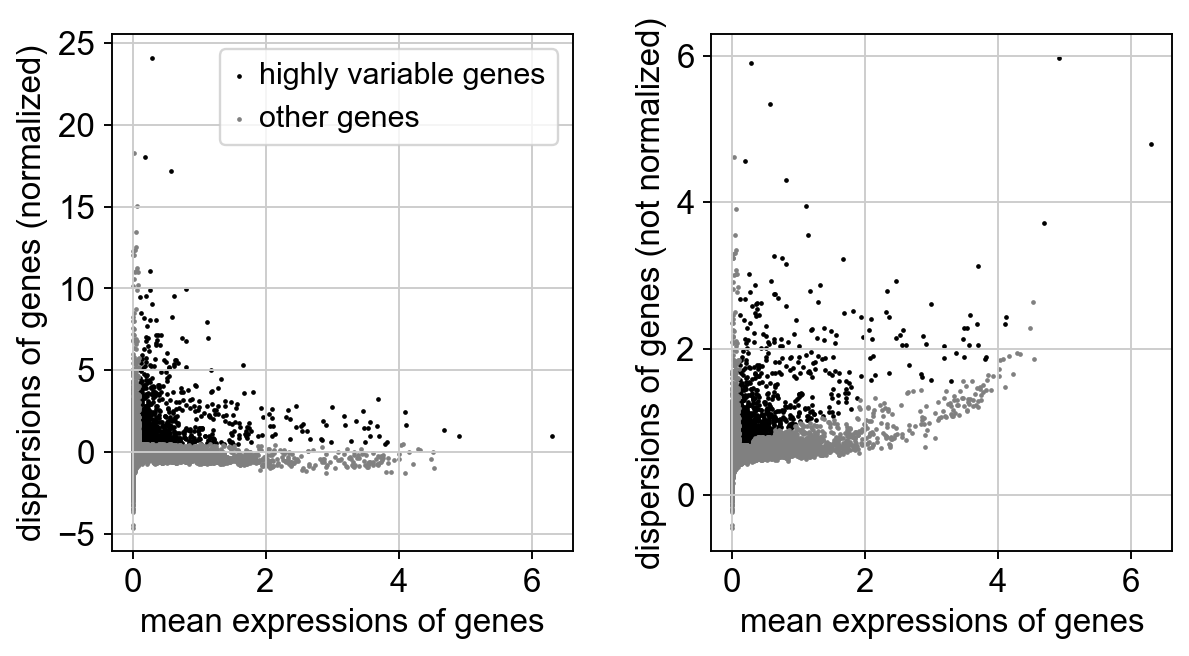

Scatterplots of normalized and non-normalized mean gene expression from 3-month organoids


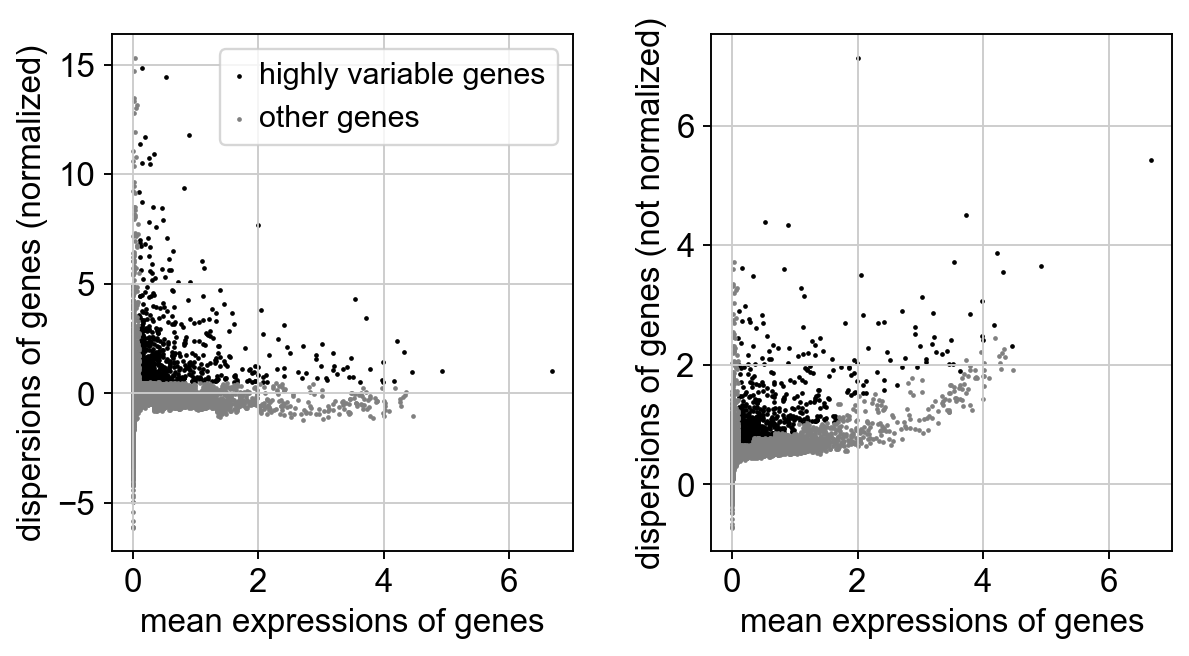

Scatterplots of normalized and non-normalized mean gene expression from 6-month organoids


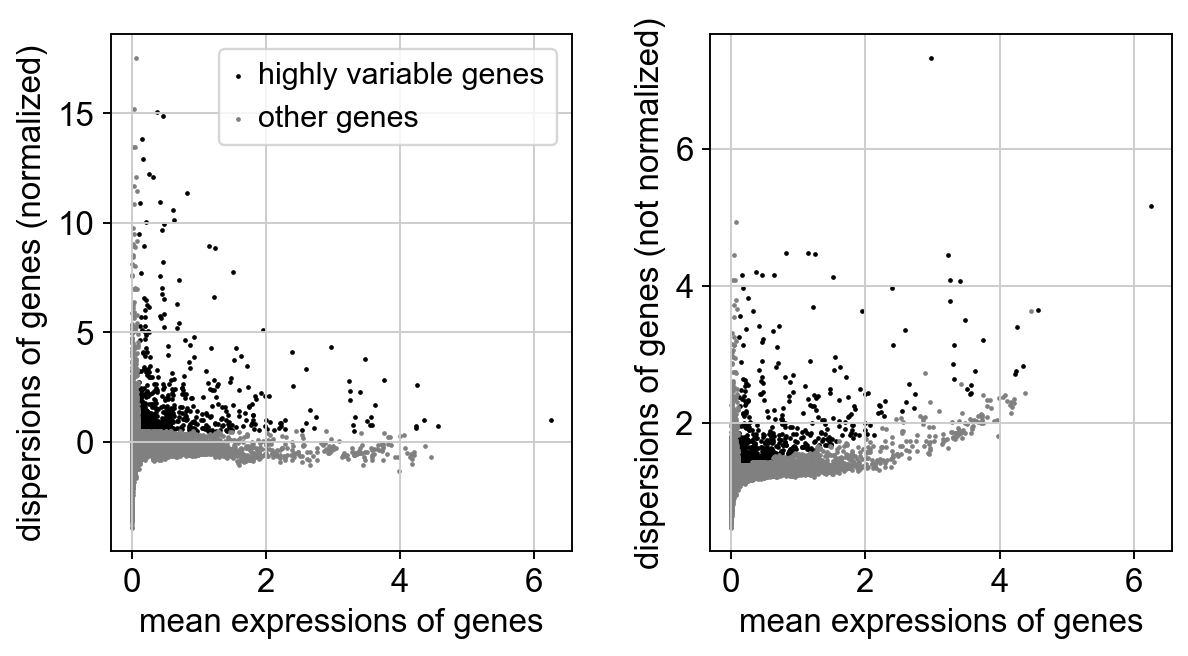

Scatterplots of normalized and non-normalized mean gene expression from 10-month organoids


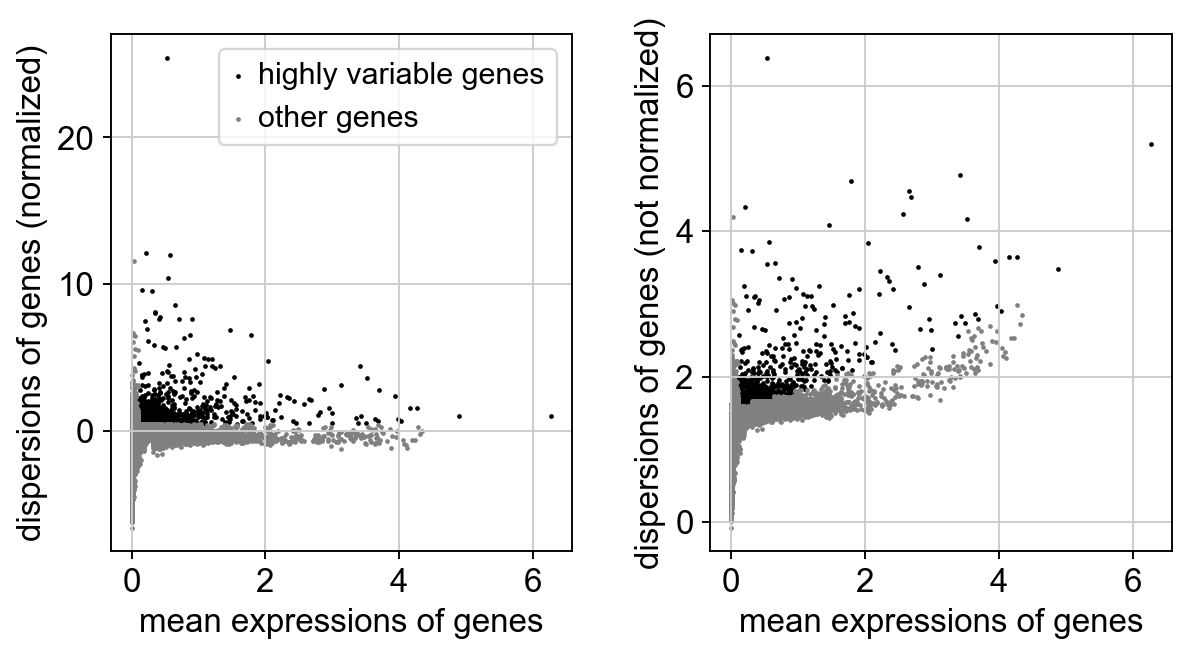

In [37]:
# plot highly variable genes from others of the dataset
for month, dataset in zip(['1-month', '3-month', '6-month', '10-month'],[m1, m3, m6, m10]):
    print('Scatterplots of normalized and non-normalized mean gene expression from ' + month + ' organoids')
    sc.pl.highly_variable_genes(dataset)

Perform the dimensionality reduction with PCA and compute the neighborhood graph for clustering with a UMAP graph representation. The clustering is needed to determine cell types based on their gene expression profiles.

In [11]:
for dataset in [m1, m3, m6, m10]:
    sc.pp.pca(dataset, n_comps = 30, use_highly_variable = True, svd_solver='arpack')
    sc.pp.neighbors(dataset, n_neighbors = 15, n_pcs = 30, knn = True)
    sc.tl.umap(dataset)

computing PCA
    on highly variable genes
/Users/bryantcao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
    with n_comps=30
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)
computing PCA
    on highly variable genes
/Users/bryantcao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
    with n_

Plot the UMAP graph representation of cells and color by their read count values. Clusters are undetermined.

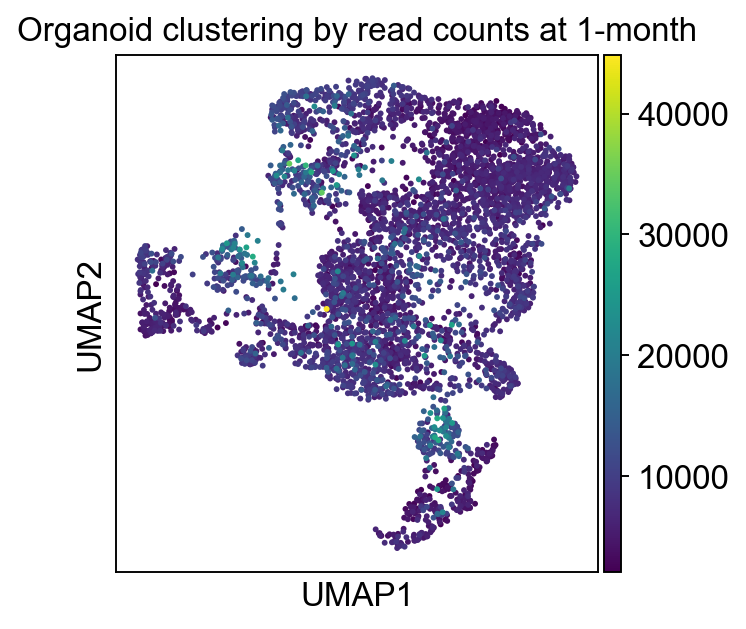

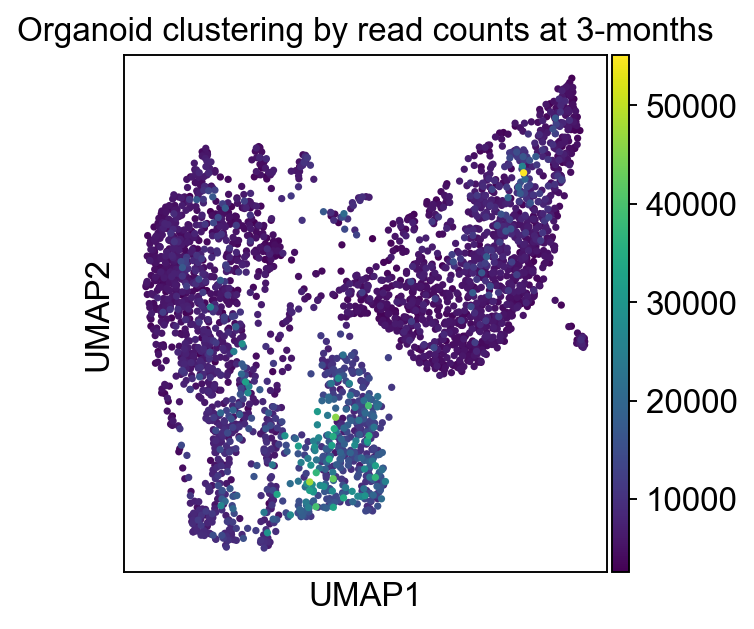

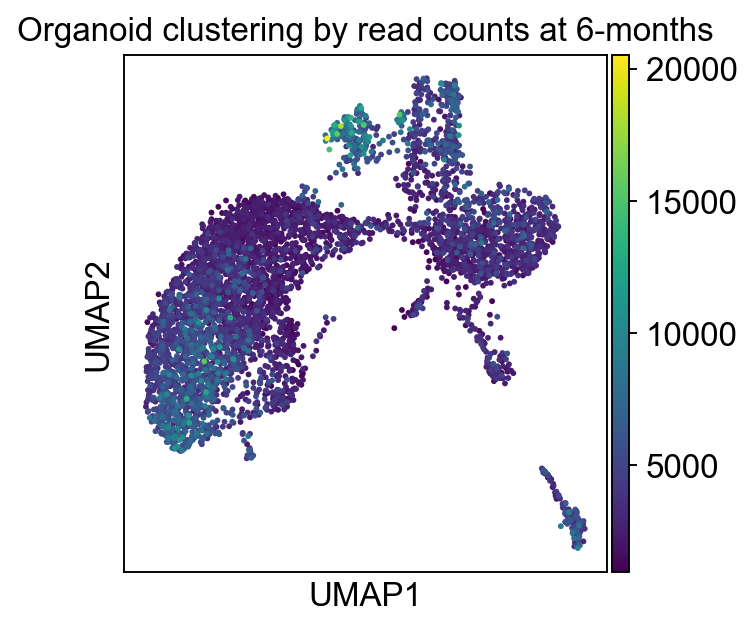

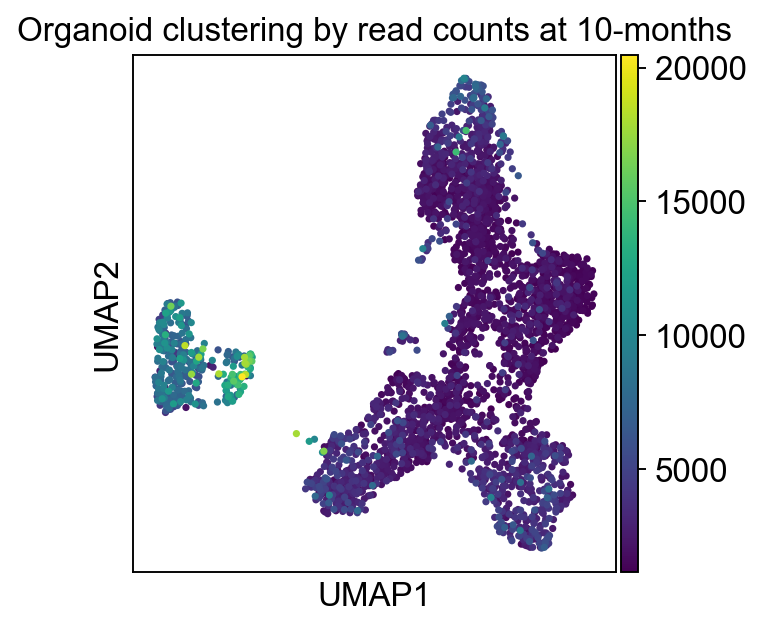

In [53]:
# colors are by read counts - showing cells with high read counts (and in turn high gene expression of any gene)

for month,dataset in zip(['1-month', '3-months', '6-months', '10-months'], [m1, m3, m6, m10]):
    sc.pl.umap(dataset, color='n_counts', return_fig = True)
    plt.title('Organoid clustering by read counts at ' + month)

Perform Louvain-based clustering to assign clusters (the cell types) to the cell populations. Clusters at this point are determined de novo and need to be assigned.

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 15 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:01)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 13 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 13 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:01)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 11 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


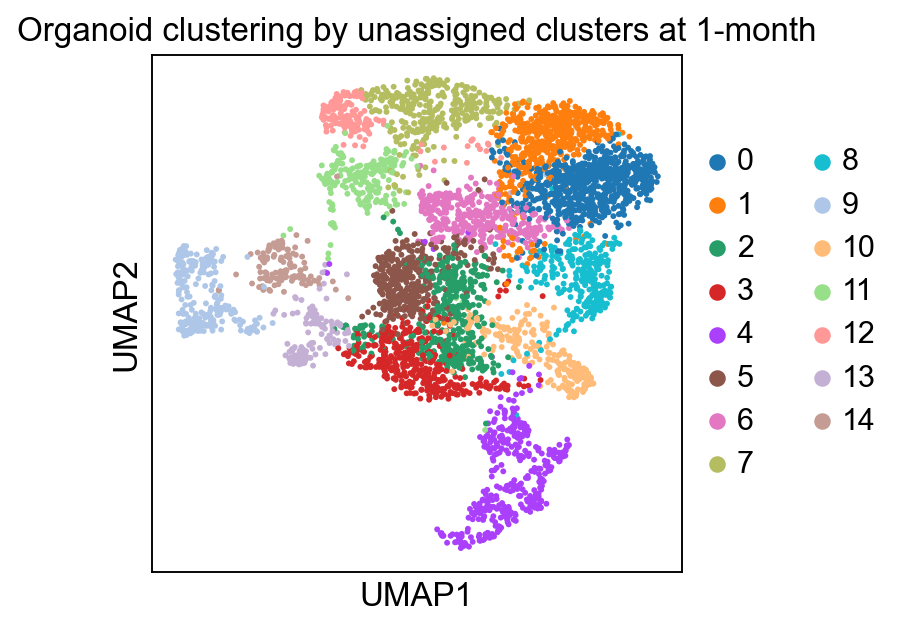

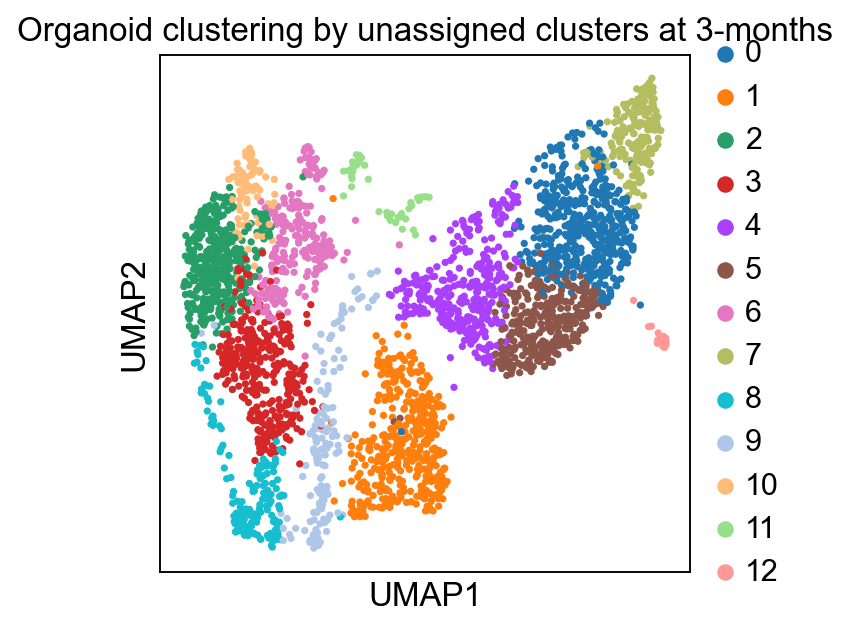

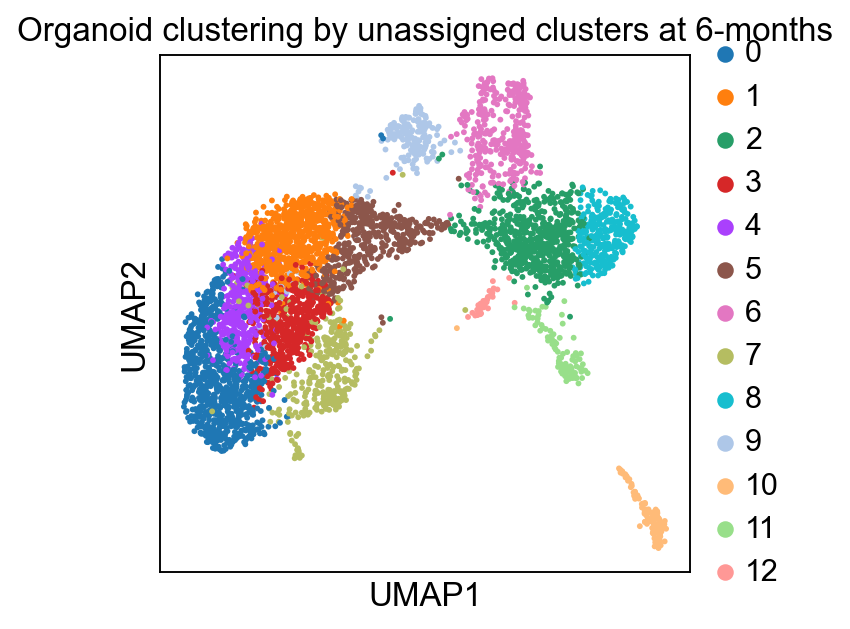

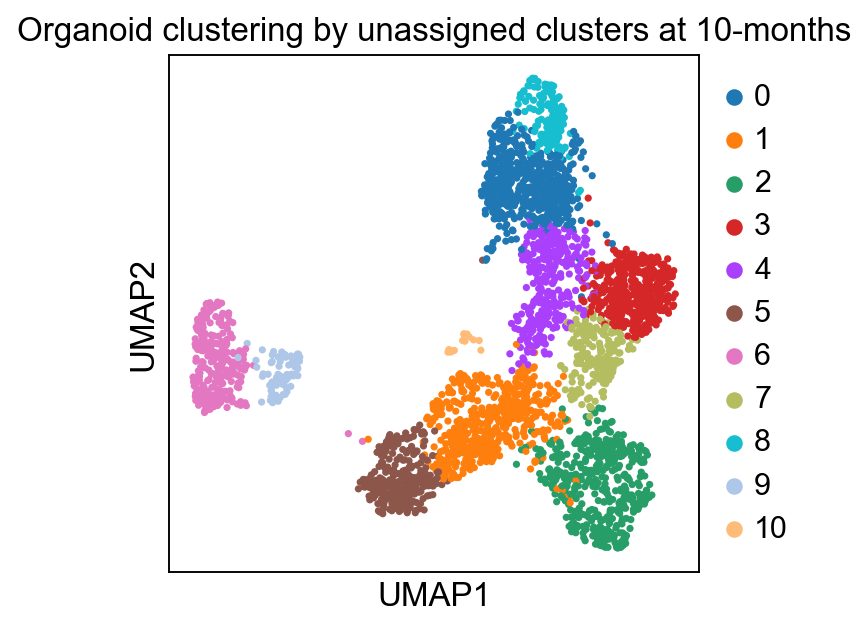

In [50]:
for month, dataset in zip(['1-month', '3-months', '6-months', '10-months'],[m1, m3, m6, m10]):
    sc.tl.louvain(dataset, key_added='louvain')
    sc.pl.umap(dataset, color = 'louvain', return_fig = True)
    plt.title('Organoid clustering by unassigned clusters at ' + month)


Determine representative marker genes (the most highly expressed genes representing a cell type) from each cluster and use known clustering information in the original analysis to assign cell types to all cell populations. Note that these clustering techniques are generalized to estimate cell types based on known gene information and that there may be clustered cells that could fall under a different cell type.

In [17]:
# calculate marker genes from each cluster
for dataset in [m1, m3, m6, m10]:
    sc.tl.rank_genes_groups(dataset, groupby='louvain', key_added='rank_genes')
    
# return the top 50 marker genes of each cluster (column name)
known_markers = pd.read_csv('data/clusters_with_names.csv', index_col = 0)
marker_clusters = dict() 
m1_clusters, m3_clusters, m6_clusters, m10_clusters = [],[],[],[]

for index in range(known_markers.shape[1]): 
    marker_genes = known_markers.iloc[:, index].dropna() 
    d = {gene:marker_genes.name for gene in marker_genes}
    marker_clusters.update(d)

with open('data/merged_gene_conversion_list.txt', 'w') as outfile:
    for gene_list in glob.glob('data/scRNA-seq/' + '*_genes.tsv'):
        with open(gene_list) as infile:
            outfile.write(infile.read())       
merged_conver = pd.read_csv('data/merged_gene_conversion_list.txt', delimiter = '\t', names = ['GeneID','GeneSymbol']).drop_duplicates()
merged_conver_dict = dict(zip(merged_conver['GeneID'], merged_conver['GeneSymbol']))

for sample_name, dataset in zip([m1_clusters, m3_clusters, m6_clusters, m10_clusters], [m1, m3, m6, m10]):
    top_genes = pd.DataFrame(dataset.uns['rank_genes']['names']).head(50) 
    top_genes_remap = top_genes.replace({str(k):merged_conver_dict for k in range(len(top_genes.columns))})
    top_clusters_remap = top_genes_remap.replace({str(k):marker_clusters for k in range(len(top_genes_remap.columns))})
    cluster_count = top_clusters_remap.apply(pd.Series.value_counts).loc[['GABAergic Neurons', 'Glutamatergic Neurons', 'Glia', 'Intermediate Progenitors', 'Early Progenitors', 'Mitotic Cells', 'Other']]
    for index in range(cluster_count.shape[1]): 
        cluster = cluster_count.iloc[:, index].dropna() 
        sample_name.append(cluster.idxmax())
   

ranking genes
    finished: added to `.uns['rank_genes']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)
ranking genes
    finished: added to `.uns['rank_genes']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)
ranking genes
    finished: added to `.uns['rank_genes']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
 

Reassign de novo cell clusters with the determined clustering information and replot the UMAP graph representations with this assigned clustering information. Of note is the prevalence of early progenitor clusters in the early samples that becomes less prevalent over time and the emergence of the cluster of GABAergic neurons later in development.

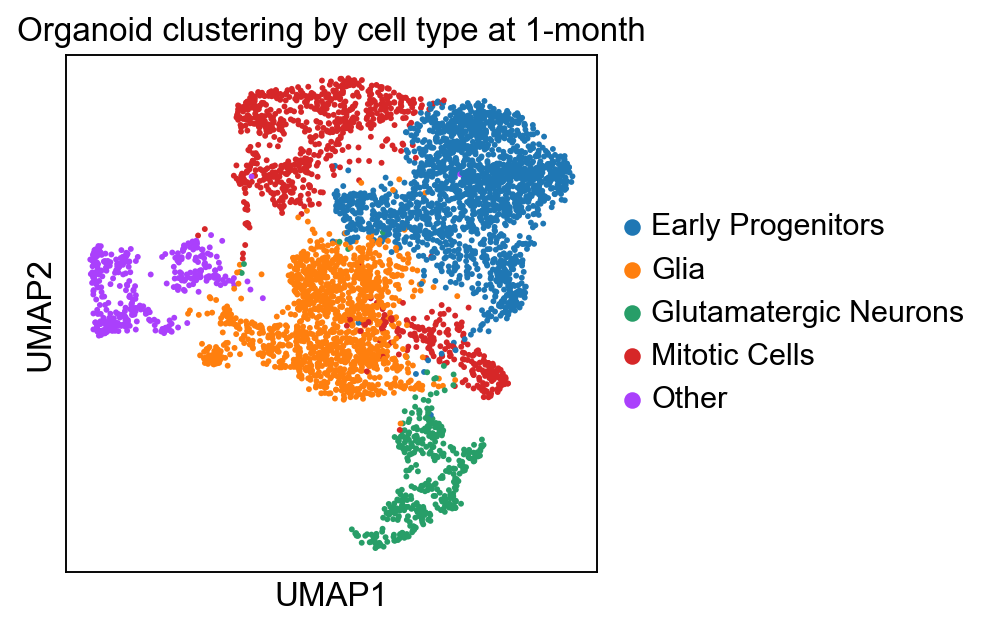

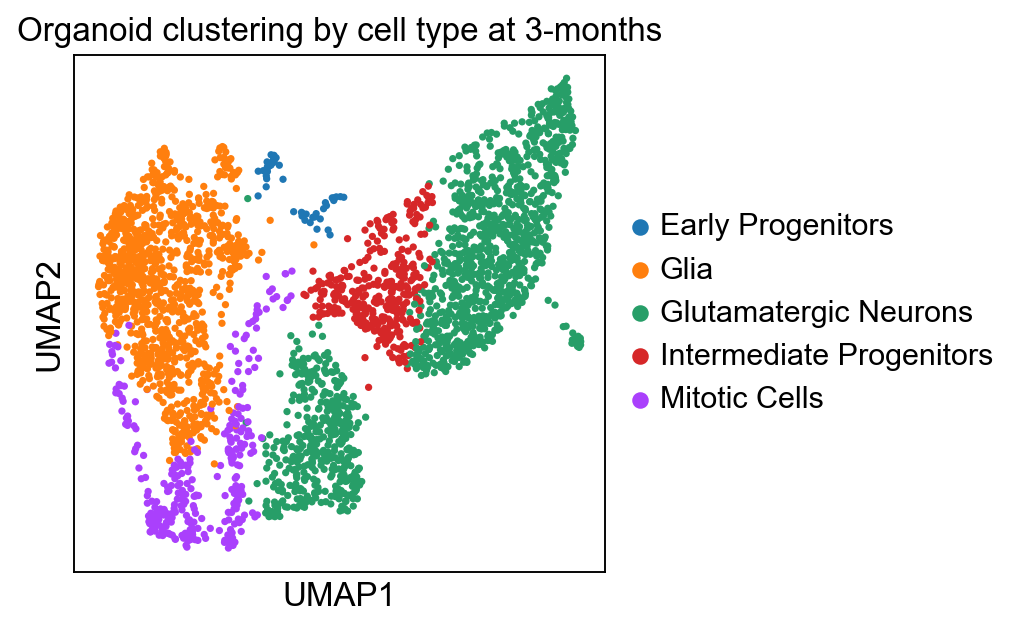

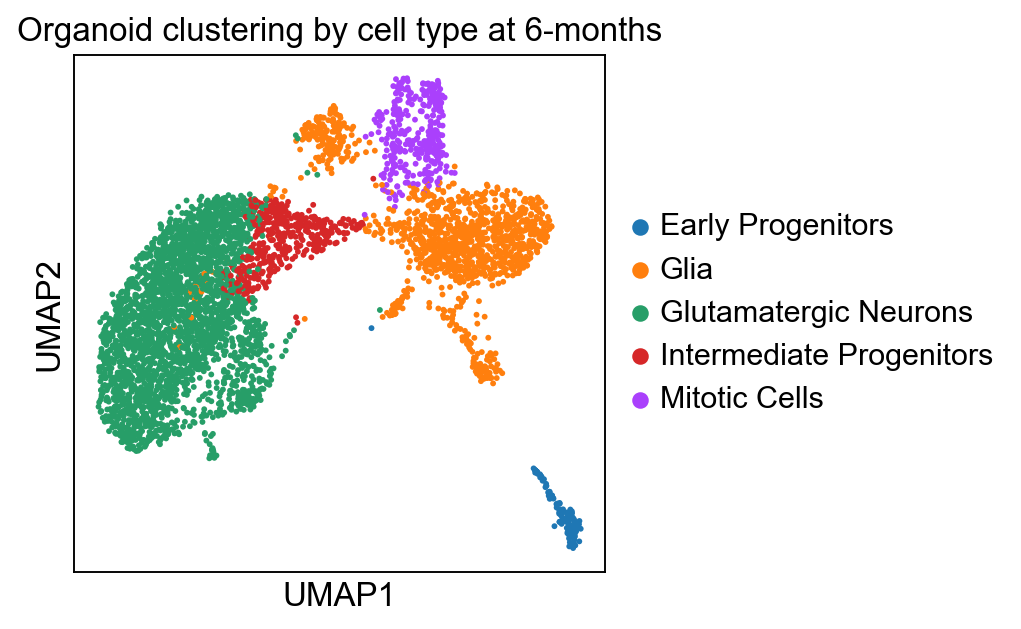

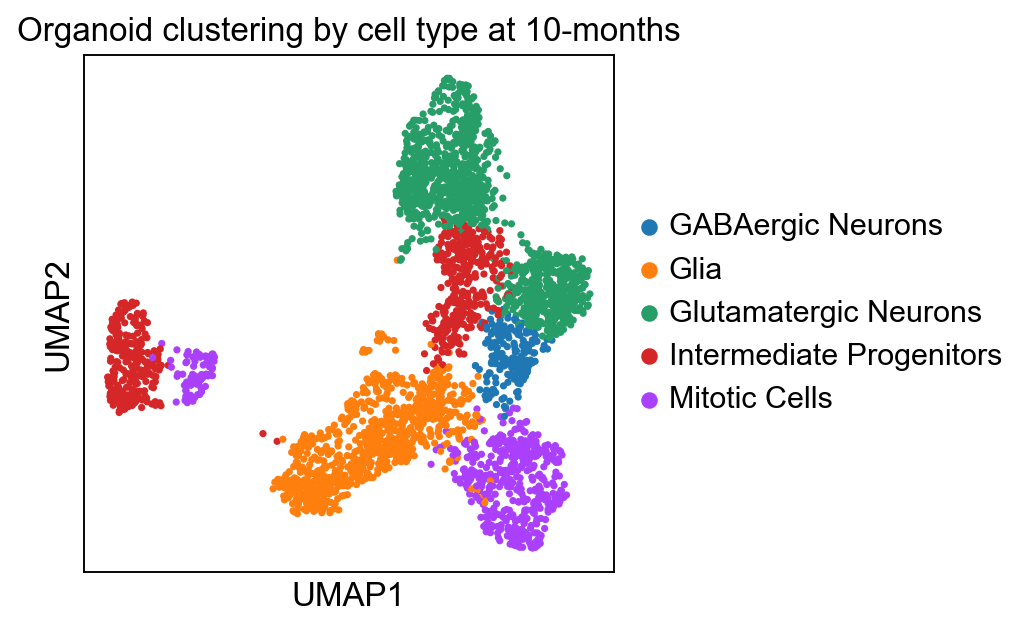

In [51]:
# note: colors/clusters do not match up across samples
for month, sample_name, dataset in zip(['1-month', '3-months', '6-months', '10-months'], [m1_clusters, m3_clusters, m6_clusters, m10_clusters], [m1, m3, m6, m10]):
    reassignment = {str(k):v for k,v in zip(range(len(sample_name)), sample_name)}
    dataset.obs['cell_type'] = dataset.obs['louvain'].map(reassignment).astype('category')
    sc.pl.umap(dataset, color = 'cell_type', title = 'Organoid clustering by cell type at ' + month )

Merge data annotations across time points and perform any batch corrections with ComBat before exporting the consolidated annotations.

In [26]:
# perform batch correction on the merged annotations with ComBat
# samples in columns are referred to as "sample-0/1/2/3" which correspond to 1/3/6/10-month organoids
adata_merge = m1.concatenate(m3, m6, m10, batch_key = 'sample')
sc.pp.combat(adata_merge, key = 'sample')

# verify QC and normalization methods on the merged data
adata_merge.var_names_make_unique()

adata_merge.var['mt'] = adata_merge.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_merge, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

adata_merge.obs['n_counts'] = adata_merge.X.sum(1)
adata_merge.obs['log_counts'] = np.log(adata_merge.obs['n_counts'])
adata_merge.obs['n_genes'] = (adata_merge.X > 0).sum(1)

# recompute PCA and neighbors
sc.pp.highly_variable_genes(adata_merge, min_mean = 0.1, max_mean = 8)
sc.pp.pca(adata_merge, n_comps = 30, use_highly_variable = True, svd_solver='arpack')
sc.pp.neighbors(adata_merge, n_neighbors = 15, n_pcs = 30, knn = True)

# recompute and visualize UMAP coordinates
# coordinates are set to visualize by samples

sc.tl.umap(adata_merge)
sc.pl.umap(adata_merge, color = 'sample')

# determine genes from each cluster of the merged data - may not be as useful without harmonization
sc.tl.rank_genes_groups(adata_merge, groupby='louvain_merged', key_added='rank_genes')

all_clusters = []
top_genes = pd.DataFrame(adata_merge.uns['rank_genes']['names']).head(50) 
top_genes_remap = top_genes.replace({str(k):merged_conver_dict for k in range(len(top_genes.columns))})
top_clusters_remap = top_genes_remap.replace({str(k):marker_clusters for k in range(len(top_genes_remap.columns))})
cluster_count = top_clusters_remap.apply(pd.Series.value_counts).loc[['GABAergic Neurons', 'Glutamatergic Neurons', 'Glia', 'Intermediate Progenitors', 'Early Progenitors', 'Mitotic Cells', 'Other']]
for index in range(cluster_count.shape[1]): 
    cluster = cluster_count.iloc[:, index].dropna() 
    all_clusters.append(cluster.idxmax())

reassignment = {str(k):v for k,v in zip(range(len(all_clusters)), all_clusters)}
adata_merge.obs['cell_type_merged'] = adata_merge.obs['louvain_merged'].map(reassignment).astype('category')
sc.pl.umap(adata_merge, color = 'cell_type_merged')

... storing 'louvain' as categorical
... storing 'cell_type' as categorical
Standardizing Data across genes.

Found 4 batches

Found 0 numerical variables:
	

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting data



In [38]:
# overview of the cell information collected following log-normalization and batch correction
# each barcode is a cell
''' 
columns:
- number of genes with read counts
- their normalized counts to 10000 transcripts
- the mitochrondrial count/percent (should be 0)
- a duplicate of normalized counts
- the counts on a log-scale
- the number of genes detected (may be compounding with sample)
- the louvain cluster that was determined from the individual sample (use this for cell type assignment)
- the cell type that was redetermined based on known marker genes from the publication (use this for cell types)
- the sample (0 = 1-month, 1 = 3-month, 2 = 6-month, 3 = 10-month)
- the louvain cluster that was determined from the merged data (note: this clustering is determined from all cells together - and is not representative of cell type proportions at each stage)
- the merged cell type that was redetermined based on known marker genes from the publication (this is not representative of cell type proportions at each stage)
'''
display(x.obs)
x.obs.to_csv('gene_expression_outputs/merged_cell_counts_and_clusters.csv')

n_genes_by_counts  total_counts  total_counts_mt  \
AAACCTGAGAATTGTG-1-0              13974   2852.240682              0.0   
AAACCTGAGCAACGGT-1-0              13974   2481.215736              0.0   
AAACCTGGTGCCTTGG-1-0              13974   3105.053749              0.0   
AAACCTGTCCACTGGG-1-0              13974   2550.254177              0.0   
AAACCTGTCGAACGGA-1-0              13974   2487.201769              0.0   
...                                 ...           ...              ...   
TTTGTCAAGGTGATTA-1-3              13974   2983.200758              0.0   
TTTGTCACAGTTCATG-1-3              13974   2018.388746              0.0   
TTTGTCATCATGCAAC-1-3              13974   2622.142564              0.0   
TTTGTCATCTCGAGTA-1-3              13974   2870.648529              0.0   
TTTGTCATCTGCCAGG-1-3              13974   2244.017504              0.0   

                      pct_counts_mt     n_counts  log_counts  n_genes louvain  \
AAACCTGAGAATTGTG-1-0            0.0  2852.240682    7.955860     4373       9   
AAACCTGAGCAACGGT-1-0            0.0  2481.215736    7.816504     4446      13   
AAACCTGGTGCCTTGG-1-0            0.0  3105.053749    8.040786     5345      12   
AAACCTGTCCACTGGG-1-0            0.0  2550.254177    7.843948     4113       6   
AAACCTGTCGAACGGA-1-0            0.0  2487.201769    7.818914     4414       0   
...                             ...          ...         ...      ...     ...   
TTTGTCAAGGTGATTA-1-3            0.0  2983.200758    8.000752    13030       6   
TTTGTCACAGTTCATG-1-3            0.0  2018.388746    7.610055    12920       3   
TTTGTCATCATGCAAC-1-3            0.0  2622.142564    7.871747    12955       0   
TTTGTCATCTCGAGTA-1-3            0.0  2870.648529    7.962293    12990       1   
TTTGTCATCTGCCAGG-1-3            0.0  2244.017504    7.716023    12929       0   

                                     cell_type sample louvain_merged  \
AAACCTGAGAATTGTG-1-0                     Other      0             13   
AAACCTGAGCAACGGT-1-0                      Glia      0              5   
AAACCTGGTGCCTTGG-1-0             Mitotic Cells      0              3   
AAACCTGTCCACTGGG-1-0         Early Progenitors      0              0   
AAACCTGTCGAACGGA-1-0         Early Progenitors      0              0   
...                                        ...    ...            ...   
TTTGTCAAGGTGATTA-1-3  Intermediate Progenitors      3             11   
TTTGTCACAGTTCATG-1-3     Glutamatergic Neurons      3             12   
TTTGTCATCATGCAAC-1-3     Glutamatergic Neurons      3              7   
TTTGTCATCTCGAGTA-1-3                      Glia      3              9   
TTTGTCATCTGCCAGG-1-3     Glutamatergic Neurons      3              1   

                              cell_type_merged  
AAACCTGAGAATTGTG-1-0                      Glia  
AAACCTGAGCAACGGT-1-0                      Glia  
AAACCTGGTGCCTTGG-1-0             Mitotic Cells  
AAACCTGTCCACTGGG-1-0         Early Progenitors  
AAACCTGTCGAACGGA-1-0         Early Progenitors  
...                                        ...  
TTTGTCAAGGTGATTA-1-3  Intermediate Progenitors  
TTTGTCACAGTTCATG-1-3     Glutamatergic Neurons  
TTTGTCATCATGCAAC-1-3     Glutamatergic Neurons  
TTTGTCATCTCGAGTA-1-3                      Glia  
TTTGTCATCTGCCAGG-1-3     Glutamatergic Neurons  

[16086 rows x 12 columns]

In [39]:
# overview of the gene information collected following log-normalization and batch correction
# each ENSG gene identifier is a gene
# the columns are repeated - 0 to 3 corresponding to each sample, and then again for the merged data
''' 
columns for an individual sample: 
- the gene symbol that corresponds to the gene ID
- if this is a mitochondrial gene (all should be False)
- number of cells that have _any_ read counts for this gene
- the mean of those read counts in cells
- the percentage of cells that this gene does not appear in (i.e. have positive read counts for)
- the total of read counts for this gene
- a duplicate of the number of cells
- whether this gene is highly variable from genes in its sample (based on means and dispersions)
- means per gene
- dispersions per gene
- normalized dispersions per gene
'''
display(x.var)
x.var.to_csv('gene_expression_outputs/merged_gene_counts_and_frequency.csv')

gene_symbols     mt  n_cells_by_counts-0  mean_counts-0  \
ENSG00000279457     FO538757.2  False                 1673       0.453435   
ENSG00000228463     AP006222.2  False                 1359       0.346854   
ENSG00000237094  RP4-669L17.10  False                   50       0.010555   
ENSG00000237491  RP11-206L10.9  False                  273       0.060224   
ENSG00000225880      LINC00115  False                   42       0.008692   
...                        ...    ...                  ...            ...   
ENSG00000198727         MT-CYB  False                 4828      28.638245   
ENSG00000276256     AC011043.1  False                  505       0.117136   
ENSG00000273748     AL592183.1  False                   42       0.008899   
ENSG00000278817     AC007325.4  False                 1457       0.429222   
ENSG00000271254     AC240274.1  False                  255       0.057326   

                 pct_dropout_by_counts-0  total_counts-0  n_cells-0  \
ENSG00000279457                65.376656          2191.0       1673   
ENSG00000228463                71.875000          1676.0       1359   
ENSG00000237094                98.965232            51.0         50   
ENSG00000237491                94.350166           291.0        273   
ENSG00000225880                99.130795            42.0         42   
...                                  ...             ...        ...   
ENSG00000198727                 0.082781        138380.0       4828   
ENSG00000276256                89.548841           566.0        505   
ENSG00000273748                99.130795            43.0         42   
ENSG00000278817                69.846854          2074.0       1457   
ENSG00000271254                94.722682           277.0        255   

                 highly_variable-0   means-0  dispersions-0  ...  \
ENSG00000279457              False  0.494076       0.599025  ...   
ENSG00000228463              False  0.387578       0.506023  ...   
ENSG00000237094              False  0.015183       0.524897  ...   
ENSG00000237491              False  0.080520       0.677353  ...   
ENSG00000225880              False  0.013084       0.607286  ...   
...                            ...       ...            ...  ...   
ENSG00000198727               True  3.704046       2.055510  ...   
ENSG00000276256              False  0.146795       0.571739  ...   
ENSG00000273748              False  0.011719       0.526286  ...   
ENSG00000278817              False  0.459987       0.683195  ...   
ENSG00000271254              False  0.076515       0.547487  ...   

                 dispersions_norm-3  n_cells_by_counts  mean_counts  \
ENSG00000279457           -0.130002              16086     0.221768   
ENSG00000228463            0.193979              16086     0.202202   
ENSG00000237094           -0.292817              16086     0.004880   
ENSG00000237491           -0.386012              16086     0.035307   
ENSG00000225880            0.315982              16086     0.008552   
...                             ...                ...          ...   
ENSG00000198727            0.585029              16086     2.816842   
ENSG00000276256            0.063999              16086     0.087674   
ENSG00000273748           -0.397692              16086     0.018886   
ENSG00000278817           -0.239699              16086     0.140353   
ENSG00000271254            0.427940              16086     0.043407   

                 pct_dropout_by_counts  total_counts  n_cells  \
ENSG00000279457                    0.0   3567.360408    10562   
ENSG00000228463                    0.0   3252.624601    10143   
ENSG00000237094                    0.0     78.503687     8163   
ENSG00000237491                    0.0    567.952248     8487   
ENSG00000225880                    0.0    137.566058     8165   
...                                ...           ...      ...   
ENSG00000198727                    0.0  45311.722216    16062   
ENSG00000276256                    0.0   1410.3271

## Combining gene expression and MEA data analysis and results
Objectives in this section:
- Determine oscillatory features from the consolidated MEA recordings
- Reduce the dimensionality of features from the cell population exports
- Calculate trends as a regression line from each of the reduced features of genetic and electrophysiological data

Load the LFP features and quantify their averages, variance, and percent change.

In [ ]:
lfp_df = pd.read_csv('./data/LFP_features.csv')
lfp_df = lfp_df.dropna()
lfp_df

lfp_avg_df = pd.DataFrame(columns=["day","spike_cnt","spike_rate","isi","fano","oscillation",
                               "centerfreq","power","percent_oscillation"])
lfp_var_df = pd.DataFrame(columns=["day","spike_cnt","spike_rate","isi","fano","oscillation",
                               "centerfreq","power","percent_oscillation"])
for d in lfp_df.day.unique():
    d_read = lfp_df.loc[lfp_df['day'] == d]
    mean_spike_cnt = d_read['avg_spike_cnt'].mean()
    mean_spike_rate = d_read['avg2_spike_rate'].mean()
    mean_isi = d_read['avg2_isi'].mean()
    mean_fano = d_read['avg_fano'].mean()
    mean_oscillation = d_read['average_oscillation'].mean()
    mean_centerfreq = d_read['average_centerfreq'].mean()
    mean_power = d_read['average_power'].mean()
    mean_percent_oscillation = d_read['percent_oscillation'].mean()
    var_spike_cnt = d_read['avg_spike_cnt'].var()
    var_spike_rate = d_read['avg2_spike_rate'].var()
    var_isi = d_read['avg2_isi'].var()
    var_fano = d_read['avg_fano'].var()
    var_oscillation = d_read['average_oscillation'].var()
    var_centerfreq = d_read['average_centerfreq'].var()
    var_power = d_read['average_power'].var()
    var_percent_oscillation = d_read['percent_oscillation'].var()
    lfp_avg_df.loc[len(lfp_avg_df),:] = [d,mean_spike_cnt,mean_spike_rate,mean_isi,
                                               mean_fano, mean_oscillation, mean_centerfreq,
                                         mean_power,mean_percent_oscillation]
    lfp_var_df.loc[len(lfp_var_df),:] = [d,var_spike_cnt,var_spike_rate,var_isi,
                                               var_fano, var_oscillation, var_centerfreq,
                                         var_power,var_percent_oscillation]

In [94]:
# average of LFP data
lfp_avg_df

day spike_cnt spike_rate        isi      fano oscillation centerfreq  \
0     0   599.487    2.48751   0.420421  0.999801      1.5431    32.7391   
1     3     466.7    1.93452   0.576578  0.999845     1.55765    35.1593   
2    10   1036.06    4.31246   0.358831  0.999655     1.56276    31.9802   
3    33   741.705     5.4757    0.32343  0.999562     1.64095    33.5226   
4    44   738.851    5.41666   0.341706  0.999567     1.59674    35.7585   
5    47   696.324    4.36055   0.389444  0.999651     1.57845    35.8158   
6    51   1047.44     4.0209   0.360749  0.999678     1.62845    34.9528   
7    54   934.798    6.59122   0.307046  0.999473     1.57892    36.2144   
8    62   772.122    5.34708   0.308447  0.999572     1.62246    34.9935   
9    68   501.874    5.24118   0.325737  0.999581     1.62627    34.8836   
10   69   896.228    4.39864   0.326826  0.999648     1.60226    35.4043   
11   75   841.863    5.46941   0.318426  0.999562     1.61636    36.7748   
12   79   763.977    4.65374   0.330343  0.999628     1.65876    35.0373   
13   82   1014.23    5.90318   0.298251  0.999528     1.39978    44.8648   
14   96   786.265    6.27675   0.259677  0.999498     1.56661    39.3588   
15  102   750.263    6.83212   0.230835  0.999453     1.55514    42.3359   
16  110   1736.49    7.22037   0.222052  0.999422     1.47935     44.917   
17  116   395.416    9.59647   0.189063  0.999232     1.41494    48.1742   
18  128   2049.44     8.5216   0.189282  0.999318     1.41225    47.2443   
19  131   2818.87    11.1308   0.161568   0.99911     1.51828    47.4772   
20  138   2101.37    8.51621   0.178029  0.999319     1.55418    44.4037   
21  139   1676.07    6.87619    0.20442   0.99945     1.34783    49.8755   
22  145   3480.69    14.4878   0.129998  0.998841     1.39318    49.6728   
23  152   3790.54     15.794   0.114256  0.998736     1.45377    47.6313   
24  159   3785.33    15.4032   0.111893  0.998768     1.48704    49.1033   
25  166   3762.65    15.1415   0.106646  0.998789     1.39829    49.2171   
26  173    3692.8    14.8604   0.101637  0.998811     1.44333    49.6388   
27  180    3738.2    15.4792   0.104297  0.998762     1.49232    48.1198   
28  187   3569.05    14.8402      0.116  0.998813     1.46514    48.4997   
29  191   3112.28    12.9141     0.1323  0.998967      1.4316    47.6157   
30  194   4693.16    19.5346  0.0887355  0.998437     1.45742    50.9864   
31  201   4376.73    18.0113    0.10865  0.998559      1.4285    47.5584   
32  208   5066.26    20.8704  0.0923368   0.99833     1.50008    47.9886   
33  215   7667.48    28.2153  0.0746804  0.997743     1.50205    51.3369   
34  222   6297.03    25.4684   0.083602  0.997963     1.41528    50.3309   
35  228   7713.81    28.4906  0.0813766  0.997721     1.43011    51.0056   

       power percent_oscillation  
0   0.148731              0.8125  
1   0.164702               0.875  
2   0.133903            0.851562  
3    0.12006            0.876953  
4   0.140304            0.890625  
5   0.161578               0.875  
6   0.153442            0.896484  
7   0.148983            0.898438  
8   0.152806            0.871094  
9   0.144443            0.863281  
10   0.14314            0.888672  
11  0.136035             0.84375  
12  0.142338            0.886719  
13  0.149486            0.826172  
14  0.146601            0.853516  
15  0.162008            0.857422  
16  0.192114            0.833984  
17   0.16423            0.767578  
18  0.159424            0.751953  
19  0.165044            0.796875  
20  0.171572            0.804688  
21  0.146872                0.75  
22  0.164469            0.748047  
23  0.156905            0.720703  
24  0.169179            0.736328  
25  0.168609            0.714844  
26  0.177219            0.722656  
27  0.167902            0.699219  
28   0.16836            0.753906  
29  0.195161            0.763672  
30  0.208325            0.648438  
31  0.160046            0.767578  
32  0.163802            0.744141  
3

Reduce the dimensionality of the cell population outputs to their means across cell type and days.

In [151]:
clusters_df = pd.read_csv('./gene_expression_outputs/merged_cell_counts_and_clusters.csv')

cell_df_pre = clusters_df.drop(['Unnamed: 0','total_counts_mt','pct_counts_mt','cell_type_merged', 'louvain_merged'], axis = 1)
cell_df_pre['day'] = cell_df_pre['sample'].replace(samp2day)
cell_df_pre = cell_df_pre.drop('sample', axis = 1)
cell_df_pre

cell_avg_df = pd.DataFrame(columns=["cell_type","day","n_genes_by_counts","total_counts","n_counts","log_counts",
                               "n_genes","louvain"])

# For storing the variance for these features
cell_var_df = pd.DataFrame(columns=["cell_type","day","n_genes_by_counts","total_counts","n_counts","log_counts",
                               "n_genes","louvain"])

for c_type in cell_df_pre.cell_type.unique():
    type_read = cell_df_pre.loc[cell_df_pre['cell_type'] == c_type]
    for d in cell_df_pre.day.unique():
        day_read = type_read.loc[type_read['day'] == d]
        mean_n_genes_by_counts = day_read["n_genes_by_counts"].mean()
        var_n_genes_by_counts = day_read["n_genes_by_counts"].var()
        mean_total_counts = day_read["total_counts"].mean()
        var_total_counts = day_read["total_counts"].var()
        mean_n_counts = day_read["n_counts"].mean()
        var_n_counts = day_read["n_counts"].var()
        mean_log_counts = day_read["log_counts"].mean()
        var_log_counts = day_read["log_counts"].var()
        mean_n_genes = day_read["n_genes"].mean()
        var_n_genes = day_read["n_genes"].var()
        mean_louvain = day_read["louvain"].mean()
        var_louvain = day_read["louvain"].var()
        cell_avg_df.loc[len(cell_avg_df),:] = [c_type,d,mean_n_genes_by_counts,mean_total_counts,
                                               mean_n_counts, mean_log_counts, mean_n_genes,mean_louvain]
        cell_var_df.loc[len(cell_avg_df),:] = [c_type,d,var_n_genes_by_counts,var_total_counts,
                                               var_n_counts, var_log_counts, var_n_genes,var_louvain]
        

cell_avg_df = cell_avg_df.fillna(0)
cell_avg_df = cell_avg_df.iloc[4:24]
cell_avg_df = cell_avg_df.drop('n_genes_by_counts', axis = 1)
cell_avg_df = cell_avg_df.drop('louvain', axis = 1)
cell_avg_df

cell_type  day  total_counts     n_counts  log_counts  \
4                       Glia   30   2637.402579  2637.402579    7.870903   
5                       Glia   90   2320.819300  2320.819300    7.739197   
6                       Glia  180   2523.466965  2523.466965    7.820713   
7                       Glia  300   2515.065936  2515.065936    7.820694   
8              Mitotic Cells   30   2714.783224  2714.783224    7.899699   
9              Mitotic Cells   90   2667.202755  2667.202755    7.881724   
10             Mitotic Cells  180   2747.320547  2747.320547    7.912209   
11             Mitotic Cells  300   2759.196696  2759.196696    7.917542   
12         Early Progenitors   30   2267.906062  2267.906062    7.718217   
13         Early Progenitors   90   2498.160326  2498.160326    7.806491   
14         Early Progenitors  180   2391.660176  2391.660176    7.772559   
15         Early Progenitors  300      0.000000     0.000000    0.000000   
16     Glutamatergic Neurons   30   2836.651502  2836.651502    7.937667   
17     Glutamatergic Neurons   90   2681.749358  2681.749358    7.883217   
18     Glutamatergic Neurons  180   2543.805339  2543.805339    7.829919   
19     Glutamatergic Neurons  300   2470.782894  2470.782894    7.800714   
20  Intermediate Progenitors   30      0.000000     0.000000    0.000000   
21  Intermediate Progenitors   90   2318.668057  2318.668057    7.744793   
22  Intermediate Progenitors  180   2191.605365  2191.605365    7.686038   
23  Intermediate Progenitors  300   2484.157647  2484.157647    7.808172   

         n_genes  
4    4539.419355  
5    6178.603083  
6   11753.461093  
7   12966.394937  
8    4679.476031  
9    6637.292359  
10  11751.884375  
11  13002.044316  
12   4042.424483  
13   6365.673469  
14  11649.888000  
15      0.000000  
16   4514.579088  
17   6651.450350  
18  11860.794243  
19  12954.186170  
20      0.000000  
21   6067.117647  
22  11705.434679  
23  12964.300840

Calculate the variance of counts and genes across cell types and month.

In [104]:
cell_var_df = cell_var_df.drop(['louvain', 'n_genes_by_counts'], axis = 1)
cell_var_df = cell_var_df.iloc[4:24]
cell_var_df

cell_type  day total_counts n_counts  log_counts  \
5                       Glia   30      87687.3  87687.3   0.0137387   
6                       Glia   90       111421   111421   0.0212502   
7                       Glia  180       162489   162489   0.0254392   
8                       Glia  300       121222   121222   0.0185813   
9              Mitotic Cells   30      95890.3  95890.3     0.01389   
10             Mitotic Cells   90      97223.7  97223.7   0.0144821   
11             Mitotic Cells  180      93126.1  93126.1   0.0124563   
12             Mitotic Cells  300      78419.5  78419.5   0.0103666   
13         Early Progenitors   30      84224.5  84224.5    0.017102   
14         Early Progenitors   90       190792   190792   0.0370331   
15         Early Progenitors  180        81411    81411   0.0147126   
16         Early Progenitors  300          NaN      NaN         NaN   
17     Glutamatergic Neurons   30       200322   200322    0.025876   
18     Glutamatergic Neurons   90       159189   159189   0.0220688   
19     Glutamatergic Neurons  180       149616   149616     0.02304   
20     Glutamatergic Neurons  300       150041   150041   0.0225902   
21  Intermediate Progenitors   30          NaN      NaN         NaN   
22  Intermediate Progenitors   90      42989.6  42989.6  0.00792455   
23  Intermediate Progenitors  180      62663.2  62663.2   0.0126171   
24  Intermediate Progenitors  300       120244   120244   0.0188883   

        n_genes  
5        406630  
6        225450  
7       20216.5  
8       1078.29  
9        514039  
10       337039  
11       9228.3  
12      1776.98  
13       220431  
14       326020  
15      2061.26  
16          NaN  
17  1.02769e+06  
18       630938  
19      20779.2  
20      1119.73  
21          NaN  
22      81891.7  
23      3962.64  
24      1396.41

Calculate percent change in the average of LFP features.

In [121]:
first_row = lfp_avg_df.iloc[0]
days = lfp_avg_df['day']
lfp_avg_df = lfp_avg_df.drop('day', axis = 1)
for i in range(lfp_avg_df.shape[0]):
    lfp_avg_df.iloc[i] = lfp_avg_df.iloc[i]/first_row - 1
lfp_avg_df['day'] = days

lfp_avg_df

spike_cnt spike_rate        isi         fano oscillation centerfreq  \
0          0          0          0            0           0          0   
1  -0.221501  -0.222307   0.371431  4.42479e-05  0.00942634  0.0739253   
2   0.728249   0.733644  -0.146494 -0.000146024   0.0127399 -0.0231788   
3   0.237232    1.20128  -0.230699 -0.000239102   0.0634128  0.0239309   
4   0.232472    1.17754   -0.18723 -0.000234378   0.0347581   0.092226   
5   0.161533   0.752981 -0.0736796 -0.000149873   0.0229106  0.0939763   
6   0.747227   0.616436  -0.141934 -0.000122695    0.055308  0.0676164   
7    0.55933    1.64973   -0.26967 -0.000328361   0.0232108   0.106151   
8   0.287971    1.14957  -0.266338  -0.00022881   0.0514273  0.0688597   
9  -0.162828      1.107  -0.225213 -0.000220337    0.053897  0.0655028   
10  0.494991   0.768291  -0.222622  -0.00015292   0.0383389  0.0814071   
11  0.404305    1.19875  -0.242602 -0.000238599   0.0474771   0.123269   
12  0.274384   0.870845  -0.214256 -0.000173332   0.0749563  0.0701967   
13  0.691836    1.37313  -0.290588 -0.000273307  -0.0928802   0.370374   
14  0.311563    1.52331   -0.38234 -0.000303198   0.0152386   0.202195   
15  0.251508    1.74657  -0.450943 -0.000347636  0.00780104   0.293131   
16   1.89663    1.90265  -0.471834 -0.000378703  -0.0413149   0.371967   
17  -0.34041    2.85786  -0.550299 -0.000568828  -0.0830561   0.471457   
18   2.41865    2.42576  -0.549779 -0.000482821  -0.0847995   0.443053   
19   3.70214    3.47469  -0.615699   -0.0006916   -0.016087   0.450169   
20   2.50527    2.42359  -0.576546  -0.00048239  0.00718199   0.356291   
21   1.79583    1.76429  -0.513772 -0.000351163   -0.126545   0.523423   
22   4.80611    4.82424  -0.690792 -0.000960214  -0.0971577   0.517232   
23   5.32297    5.34932  -0.728235  -0.00106473  -0.0578926   0.454874   
24   5.31428    5.19223  -0.733855  -0.00103346  -0.0363322   0.499835   
25   5.27644    5.08701  -0.746336  -0.00101252  -0.0938459   0.503314   
26   5.15993    4.97402   -0.75825 -0.000990026  -0.0646547   0.516195   
27   5.23567    5.22276  -0.751922  -0.00103953  -0.0329086   0.469798   
28   4.95351    4.96588  -0.724085 -0.000988407  -0.0505213     0.4814   
29   4.19157    4.19157  -0.685314 -0.000834287  -0.0722572   0.454399   
30   6.82863    6.85307  -0.788936  -0.00136403  -0.0555241   0.557355   
31   6.30079     6.2407  -0.741567  -0.00124215  -0.0742657   0.452648   
32   7.45099    7.39007  -0.780371  -0.00147092  -0.0278775   0.465787   
33   11.7901    10.3428  -0.822367  -0.00205863  -0.0266048    0.56806   
34   9.50403    9.23851  -0.801147  -0.00183883  -0.0828353   0.537334   
35   11.8673    10.4535   -0.80644  -0.00208066  -0.0732227   0.557941   

         power percent_oscillation  day  
0            0                   0    0  
1     0.107386           0.0769231    3  
2   -0.0996985           0.0480769   10  
3    -0.192772           0.0793269   33  
4   -0.0566553           0.0961538   44  
5    0.0863767           0.0769231   47  
6    0.0316761            0.103365   51  
7   0.00169379            0.105769   54  
8    0.0274026           0.0721154   62  
9   -0.0288272              0.0625   68  
10  -0.0375898             0.09375   69  
11   -0.085361           0.0384615   75  
12  -0.0429811           0.0913462   79  
13  0.00507895           0.0168269   82  
14    -0.01432           0.0504808   96  
15   0.0892712           0.0552885  102  
16    0.291691           0.0264423  110  
17    0.104208          -0.0552885  116  
18   0.0718975          -0.0745192  128  
19    0.109683          -0.0192308  131  
20    0.153572         -0.00961538  138  
21  -0.0124985          -0.0769231  139  
22    0.105815          -0.0793269  145  
23   0.0549602           -0.112981  152  
24    0.137484            -0.09375  159  
25    0.133653           -0.120192  166  
26    0.191543           -0.110577  173  
27    0.128896           -0.139423  180  
28     0.13198          -0.0721154  187  
29  

Calculate the variance in the average of LFP features.

In [123]:
lfp_var_df

spike_cnt spike_rate        isi      fano oscillation centerfreq  \
0          0          0          0         0           0          0   
1   0.836613   0.832809    0.85943  0.832809  -0.0535502  -0.156938   
2     11.546    11.6245   0.447784   11.6245   -0.515086 -0.0559862   
3    18.7546    13.7421  -0.493457   13.7421   -0.281046  -0.413051   
4    13.4611    21.2043  0.0222322   21.2043   -0.504532  0.0247602   
5    16.2762    11.8558   0.379762   11.8558  0.00374817    1.27538   
6    4.28556    3.52387  0.0251397   3.52387    0.297465     1.1017   
7    12.9979    24.5444 -0.0789555   24.5444     1.08327   0.887937   
8    13.9038    11.9579  -0.111785   11.9579   0.0180331   0.424112   
9    9.23399    10.0916  -0.291602   10.0916   -0.197133 -0.0338214   
10   12.5419    7.68813  -0.231502   7.68813    0.197426  -0.323793   
11   13.0509    10.4033   -0.23725   10.4033   -0.650199   0.218751   
12   12.9263    5.60469  -0.236184   5.60469   -0.329437   0.185299   
13   9.91938    23.4319  -0.527578   23.4319  -0.0989787    1.51941   
14   7.49466    23.9773  -0.829177   23.9773    0.497424   0.282987   
15   8.21871    21.9416  -0.663395   21.9416    0.820828    0.37052   
16   26.4517    26.5659  -0.736214   26.5659     0.58115    1.78436   
17   1.15775    83.2484  -0.724237   83.2484   0.0831212    2.77961   
18   41.1492    41.3246  -0.697765   41.3246     1.31124    1.96491   
19   66.8217    60.4191  -0.818957   60.4191     1.48482    2.22792   
20   32.2048    30.6753  -0.770977   30.6753     1.33804    2.69047   
21   30.5532    29.8452  -0.716197   29.8452    0.265205    2.71317   
22   84.8112    85.3478  -0.811755   85.3478   -0.608878    2.15491   
23   86.7198    87.4523  -0.887657   87.4523    0.198919    3.17828   
24   76.4177    73.4538  -0.919107   73.4538     1.36991    1.84539   
25    81.676    76.7607  -0.900744   76.7608     1.29216    1.95433   
26   94.3294     88.662  -0.933284    88.662     2.24247    1.91345   
27   105.366    104.926  -0.862465   104.926     1.62397    3.83486   
28   114.359    114.839  -0.853342   114.839     2.40498    2.56125   
29   83.2073    83.2073  -0.799553   83.2073     2.41845     3.3683   
30   172.374    173.459  -0.898368   173.459     2.30333    3.22991   
31   142.006    139.662  -0.865239   139.662    0.512017    3.12189   
32   100.772    99.3104   -0.90968   99.3104     2.15157    2.74535   
33   320.359    251.746  -0.923431   251.746     3.74036    2.61974   
34   213.072    202.386  -0.931488   202.386  -0.0196768     2.1727   
35   384.846    304.711  -0.890958   304.711     1.55315    2.41305   

        power percent_oscillation  day  
0           0                   0    0  
1     1.12093           -0.281385    3  
2    -0.57213            0.012987   10  
3   -0.929415            -0.57197   33  
4    -0.75851           -0.506494   44  
5   -0.409774           -0.497835   47  
6    0.281598           -0.818723   51  
7   -0.443383           -0.731602   54  
8   -0.462919           -0.482684   62  
9   -0.604788           -0.525974   68  
10  -0.540976            -0.52868   69  
11  -0.551784            0.142857   75  
12  -0.552799           -0.465368   79  
13  -0.388571            0.397727   82  
14  -0.561121            0.402056   96  
15  -0.234069            0.189935  102  
16   0.214613            0.142316  110  
17  -0.074292             3.14232  116  
18  -0.157919             5.27219  128  
19  -0.285886             1.63203  131  
20   -0.19196             1.07792  138  
21  -0.530997             1.39827  139  
22  -0.163428             2.37175  145  
23  -0.790116             2.68344  152  
24  -0.659835             2.13799  159  
25  -0.429688              2.0974  166  
26  -0.173405             2.44372  173  
27  -0.475761             1.57792  180  
28 -0.0685325            0.435065  187  
29    1.91984            0.622835  191  
30   0.887419             1.65801  194  
31   -0.43591             0.95184  201  
32  -0.494993         

Divide the percent change of the average of LFP features by the absolute value of the square root of percent change in the variance of LFP features.

In [123]:
lfp_norm = lfp_avg_df.iloc[1:]/abs(lfp_var_df.iloc[1:])**(1/2)
lfp_norm['day'] = lfp_var_df['day']

lfp_norm

spike_cnt spike_rate        isi      fano oscillation centerfreq  \
0          0          0          0         0           0          0   
1   0.836613   0.832809    0.85943  0.832809  -0.0535502  -0.156938   
2     11.546    11.6245   0.447784   11.6245   -0.515086 -0.0559862   
3    18.7546    13.7421  -0.493457   13.7421   -0.281046  -0.413051   
4    13.4611    21.2043  0.0222322   21.2043   -0.504532  0.0247602   
5    16.2762    11.8558   0.379762   11.8558  0.00374817    1.27538   
6    4.28556    3.52387  0.0251397   3.52387    0.297465     1.1017   
7    12.9979    24.5444 -0.0789555   24.5444     1.08327   0.887937   
8    13.9038    11.9579  -0.111785   11.9579   0.0180331   0.424112   
9    9.23399    10.0916  -0.291602   10.0916   -0.197133 -0.0338214   
10   12.5419    7.68813  -0.231502   7.68813    0.197426  -0.323793   
11   13.0509    10.4033   -0.23725   10.4033   -0.650199   0.218751   
12   12.9263    5.60469  -0.236184   5.60469   -0.329437   0.185299   
13   9.91938    23.4319  -0.527578   23.4319  -0.0989787    1.51941   
14   7.49466    23.9773  -0.829177   23.9773    0.497424   0.282987   
15   8.21871    21.9416  -0.663395   21.9416    0.820828    0.37052   
16   26.4517    26.5659  -0.736214   26.5659     0.58115    1.78436   
17   1.15775    83.2484  -0.724237   83.2484   0.0831212    2.77961   
18   41.1492    41.3246  -0.697765   41.3246     1.31124    1.96491   
19   66.8217    60.4191  -0.818957   60.4191     1.48482    2.22792   
20   32.2048    30.6753  -0.770977   30.6753     1.33804    2.69047   
21   30.5532    29.8452  -0.716197   29.8452    0.265205    2.71317   
22   84.8112    85.3478  -0.811755   85.3478   -0.608878    2.15491   
23   86.7198    87.4523  -0.887657   87.4523    0.198919    3.17828   
24   76.4177    73.4538  -0.919107   73.4538     1.36991    1.84539   
25    81.676    76.7607  -0.900744   76.7608     1.29216    1.95433   
26   94.3294     88.662  -0.933284    88.662     2.24247    1.91345   
27   105.366    104.926  -0.862465   104.926     1.62397    3.83486   
28   114.359    114.839  -0.853342   114.839     2.40498    2.56125   
29   83.2073    83.2073  -0.799553   83.2073     2.41845     3.3683   
30   172.374    173.459  -0.898368   173.459     2.30333    3.22991   
31   142.006    139.662  -0.865239   139.662    0.512017    3.12189   
32   100.772    99.3104   -0.90968   99.3104     2.15157    2.74535   
33   320.359    251.746  -0.923431   251.746     3.74036    2.61974   
34   213.072    202.386  -0.931488   202.386  -0.0196768     2.1727   
35   384.846    304.711  -0.890958   304.711     1.55315    2.41305   

        power percent_oscillation  day  
0           0                   0    0  
1     1.12093           -0.281385    3  
2    -0.57213            0.012987   10  
3   -0.929415            -0.57197   33  
4    -0.75851           -0.506494   44  
5   -0.409774           -0.497835   47  
6    0.281598           -0.818723   51  
7   -0.443383           -0.731602   54  
8   -0.462919           -0.482684   62  
9   -0.604788           -0.525974   68  
10  -0.540976            -0.52868   69  
11  -0.551784            0.142857   75  
12  -0.552799           -0.465368   79  
13  -0.388571            0.397727   82  
14  -0.561121            0.402056   96  
15  -0.234069            0.189935  102  
16   0.214613            0.142316  110  
17  -0.074292             3.14232  116  
18  -0.157919             5.27219  128  
19  -0.285886             1.63203  131  
20   -0.19196             1.07792  138  
21  -0.530997             1.39827  139  
22  -0.163428             2.37175  145  
23  -0.790116             2.68344  152  
24  -0.659835             2.13799  159  
25  -0.429688              2.0974  166  
26  -0.173405             2.44372  173  
27  -0.475761             1.57792  180  
28 -0.0685325            0.435065  187  
29    1.91984            0.622835  191  
30   0.887419             1.65801  194  
31   -0.43591             0.95184  201  
32  -0.494993         

Use the calculated "normalized" percentage in the feature averages and determine the linear regression for each of these features across time points.

In [150]:
days = lfp_norm['day'].to_numpy()
lfp_reg_coef = pd.DataFrame(columns=["spike_cnt","spike_rate","isi","fano","oscillation",
                               "centerfreq","power","percent_oscillation"])
features = []
for feature in lfp_norm.drop('day', axis = 1).columns:
    y = lfp_norm[feature].to_numpy()
    x = days
    reg = LinearRegression().fit(x.reshape(-1, 1), y)
    features.append(reg.coef_[0])
lfp_reg_coef.loc[len(lfp_reg_coef),:] = features

lfp_reg_coef

spike_cnt  spike_rate         isi         fano oscillation   centerfreq  \
0  0.00335609  0.00229997 -0.00249209 -4.57785e-07 -0.00135617  0.000973274   

        power percent_oscillation  
0  0.00170951         -0.00163013

Perform the same "normalization" technique to the cell population data.

In [206]:
cell_var = pd.DataFrame(columns=["day"])
cell_var['day'] = [30, 90, 180, 300]
for ctype in cell_var_df.cell_type.unique():
    type_read = cell_var_df.loc[cell_var_df['cell_type'] == ctype].drop(['cell_type','day'], axis = 1)
    cell_var[str(ctype)+'_'+'total_counts'] = type_read['total_counts'].to_numpy()
    cell_var[str(ctype)+'_'+'n_counts'] = type_read['n_counts'].to_numpy()
    cell_var[str(ctype)+'_'+'log_counts'] = type_read['log_counts'].to_numpy()
    cell_var[str(ctype)+'_'+'n_genes'] = type_read['n_genes'].to_numpy()
cell_var = cell_var + 1

first_row = cell_avg.iloc[0]
days = cell_avg['day']
cell_avg = cell_avg.drop('day', axis = 1)
for i in range(cell_avg.shape[0]):
    cell_avg.iloc[i] = cell_avg.iloc[i]/first_row - 1
cell_avg['day'] = days

first_row = cell_var.iloc[0]
days = cell_var['day']
cell_var = cell_var.drop('day', axis = 1)
for i in range(cell_var.shape[0]):
    cell_var.iloc[i] = cell_var.iloc[i]/first_row - 1
cell_var['day'] = days
cell_var

cell_norm = cell_avg.copy()
cell_norm.iloc[1:] = cell_avg.iloc[1:]/(abs(cell_var.iloc[1:])**(1/2))
cell_norm['day'] = [30,90,180,300]

cell_norm

Glia_total_counts  Glia_n_counts  Glia_log_counts  Glia_n_genes  \
0           0.000000       0.000000         0.000000      0.000000   
1          -0.230641      -0.230641        -0.172478      0.540851   
2          -0.046756      -0.046756        -0.052664      1.629884   
3          -0.074979      -0.074979        -0.081891      1.858459   

   Mitotic Cells_total_counts  Mitotic Cells_n_counts  \
0                    0.000000                0.000000   
1                   -0.148575               -0.148575   
2                    0.070566                0.070566   
3                    0.038314                0.038314   

   Mitotic Cells_log_counts  Mitotic Cells_n_genes  \
0                  0.000000               0.000000   
1                 -0.083578               0.712842   
2                  0.037381               1.524795   
3                  0.034009               1.781229   

   Early Progenitors_total_counts  Early Progenitors_n_counts  ...  \
0                        0.000000                    0.000000  ...   
1                        0.090220                    0.090220  ...   
2                        0.298429                    0.298429  ...   
3                       -0.999565                   -0.999565  ...   

   Early Progenitors_n_genes  Glutamatergic Neurons_total_counts  \
0                   0.000000                            0.000000   
1                   0.830185                           -0.120466   
2                   1.890304                           -0.205124   
3                  -0.999755                           -0.257353   

   Glutamatergic Neurons_n_counts  Glutamatergic Neurons_log_counts  \
0                        0.000000                          0.000000   
1                       -0.120466                         -0.100003   
2                       -0.205124                         -0.229285   
3                       -0.257353                         -0.270753   

   Glutamatergic Neurons_n_genes  Intermediate Progenitors_total_counts  \
0                       0.000000                               0.000000   
1                       0.761617                              11.182962   
2                       1.643562                               8.755000   
3                       1.870018                               7.163869   

   Intermediate Progenitors_n_counts  Intermediate Progenitors_log_counts  \
0                           0.000000                             0.000000   
1                          11.182962                            87.000677   
2                           8.755000                            68.426216   
3                           7.163869                            56.813670   

   Intermediate Progenitors_n_genes  day  
0                          0.000000   30  
1                         21.201296   90  
2                        185.949558  180  
3                        346.931114  300  

[4 rows x 21 columns]

Determine the regression coefficient for each the LFP and cell population features.

In [208]:
days = cell_norm['day'].to_numpy()
cell_reg_coef = pd.DataFrame(columns=cell_norm.columns)
cell_reg_coef = cell_reg_coef.drop('day', axis = 1)
features = []
for feature in cell_norm.drop('day', axis = 1).columns:
    y = cell_norm[feature].to_numpy()
    x = days
    reg = LinearRegression().fit(x.reshape(-1, 1), y)
    features.append(reg.coef_[0])
cell_reg_coef.loc[len(cell_reg_coef),:] = features

cell_reg_coef

Glia_total_counts Glia_n_counts Glia_log_counts Glia_n_genes  \
0       2.87176e-05   2.87176e-05       -8.49e-05   0.00713078   

  Mitotic Cells_total_counts Mitotic Cells_n_counts Mitotic Cells_log_counts  \
0                0.000405278            0.000405278              0.000271438   

  Mitotic Cells_n_genes Early Progenitors_total_counts  \
0            0.00652555                    -0.00353611   

  Early Progenitors_n_counts Early Progenitors_log_counts  \
0                -0.00353611                   -0.0247482   

  Early Progenitors_n_genes Glutamatergic Neurons_total_counts  \
0               -0.00345568                       -0.000906489   

  Glutamatergic Neurons_n_counts Glutamatergic Neurons_log_counts  \
0                   -0.000906489                       -0.0010022   

  Glutamatergic Neurons_n_genes Intermediate Progenitors_total_counts  \
0                    0.00686262                             0.0160931   

  Intermediate Progenitors_n_counts Intermediate Progenitors_log_counts  \
0                         0.0160931                            0.129343   

  Intermediate Progenitors_n_genes  
0                          1.36102

In [209]:
lfp_reg_coef

spike_cnt  spike_rate         isi         fano oscillation   centerfreq  \
0  0.00335609  0.00229997 -0.00249209 -4.57785e-07 -0.00135617  0.000973274   

        power percent_oscillation  
0  0.00170951         -0.00163013

In [212]:
reg_coef = lfp_reg_coef.join(cell_reg_coef)
reg_coef

spike_cnt  spike_rate         isi         fano oscillation   centerfreq  \
0  0.00335609  0.00229997 -0.00249209 -4.57785e-07 -0.00135617  0.000973274   

        power percent_oscillation Glia_total_counts Glia_n_counts  ...  \
0  0.00170951         -0.00163013       2.87176e-05   2.87176e-05  ...   

  Early Progenitors_log_counts Early Progenitors_n_genes  \
0                   -0.0247482               -0.00345568   

  Glutamatergic Neurons_total_counts Glutamatergic Neurons_n_counts  \
0                       -0.000906489                   -0.000906489   

  Glutamatergic Neurons_log_counts Glutamatergic Neurons_n_genes  \
0                       -0.0010022                    0.00686262   

  Intermediate Progenitors_total_counts Intermediate Progenitors_n_counts  \
0                             0.0160931                         0.0160931   

  Intermediate Progenitors_log_counts Intermediate Progenitors_n_genes  
0                            0.129343                          1.36102  

[1 rows x 28 columns]

Normalize the difference matrix of linear regression coefficients. Plot the heatmap of this matrix on a log-scale. Features highlighted in lighter colors represent more similar trends between the two features. 

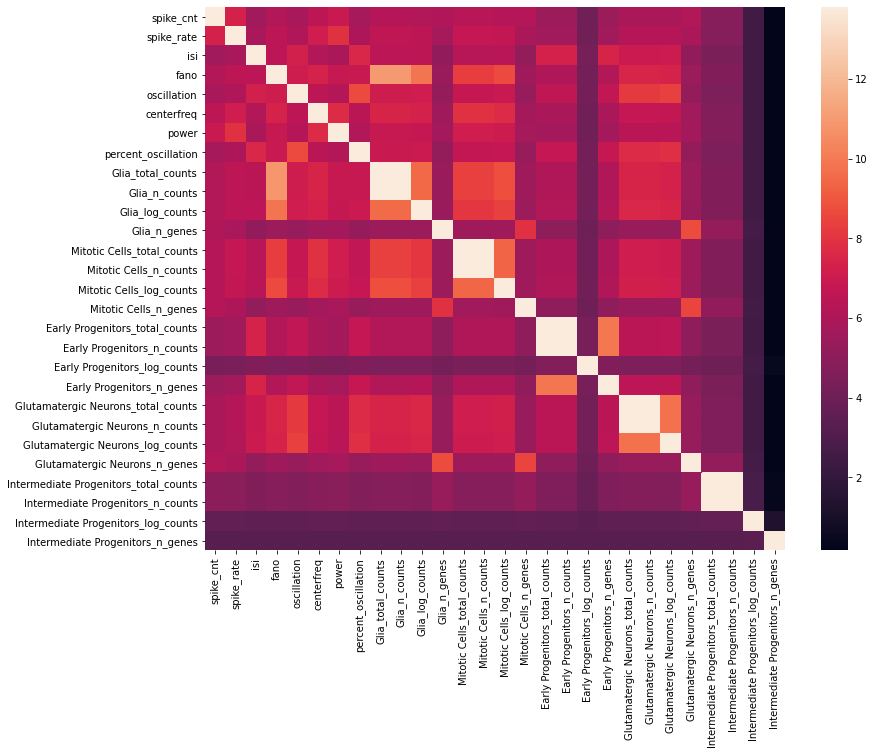

In [286]:
coef = reg_coef.to_numpy()[0].astype(float)

coef_diff = np.zeros((28,28))
coef_diff.shape

for i in range(28):
    for j in range(28):
        coef_diff[i,j] = coef[i] - coef[j]

coef_diff_norm = normalize(coef_diff, norm = 'l1')
coef_diff_norm

plt.figure(figsize=(13,10))
ax = sns.heatmap(-np.log(abs(coef_diff_norm+0.000001)), xticklabels = reg_coef.columns.to_list(),
                yticklabels = reg_coef.columns.to_list())


# Conclusion & Discussion

Our reproduction of the scRNA-seq analysis appeared to be consistent with the original analysis when it came to generating biologically relevant clusters and cell type proportions. For example, we observed the expected outcome that cell type populations would mainly consist of early progenitors and mitotic cells - which then differentiate in glutamatergic and GABAergic cells into later stages of development. From our reproduced analysis, we were also able to extract mean gene expression levels of cells at each time point, which could highlight the most active genes at each developmental stage. From extracting features from the MEA recordings and intersecting them with consolidated cell type information, we observed trends in electrophysiological features to changes in cell types. Of note in our findings, we highlighted that trends in the Fano factor of organoid recordings are most similar to the trends in the changes of read counts in glial and mitotic cells. We also found that the trend in the number of oscillations aligns with the trends in the changes of read counts in glutamatergic cells. While preliminary, these results and approach can be expanded to include further analyses - namely in cell type proportions and gene expression changes to these electophysiological features.

There were data and time limitations in our analysis that affected how we could process or interpret our results. Analyzing large-scale transcriptome and MEA recordings proved to be challenging as we had to balance between generating more information and the time constraints. Aggregate data tends to fall under the central tendency and spread, which can hide interesting results. Correlating trends at a finer level can be more faithful to the original dataset's discoveries. However, there were also gaps in information that could have helped our analysis. For example, while the sequencing information was sufficient for understanding gene expression over large developmental stages, having more than four time points spread across 10-months would likely reveal more insightful transcriptomic dynamics. In addition, the results from a scRNA-seq analysis can be augmented with other biological analyses if they were present in the original analysis - such as chromatin immunoprecipitation sequencing (ChIP-seq) to further understand epigenetic influences and protein interactions leading to observable phenotypes or a spatial transcriptomic analysis to incorporate spatial RNA profiling for understanding developmental changes in space relative to other cells. The genetic information also did not have functional annotations - which makes it difficult to determine what a gene is doing in the context of its cell population beyond a numeric gene expression value.

With our current data and results, there are still a couple of additions that we could incorporate into our analysis to further improve our findings. Something that we could incorporate are gene functional annotations from biological databases like [Gene Ontology](http://geneontology.org/) or [KEGG](https://www.genome.jp/kegg/) which would inform us of a gene’s functions and interactions along with its relative gene expression. Another analysis that we did not have time to explore was with more specific subgroups of gene expression to electrophysiological features - like determining the gene expression within a cell type within a time point and how that may be correlated to network dynamics.
